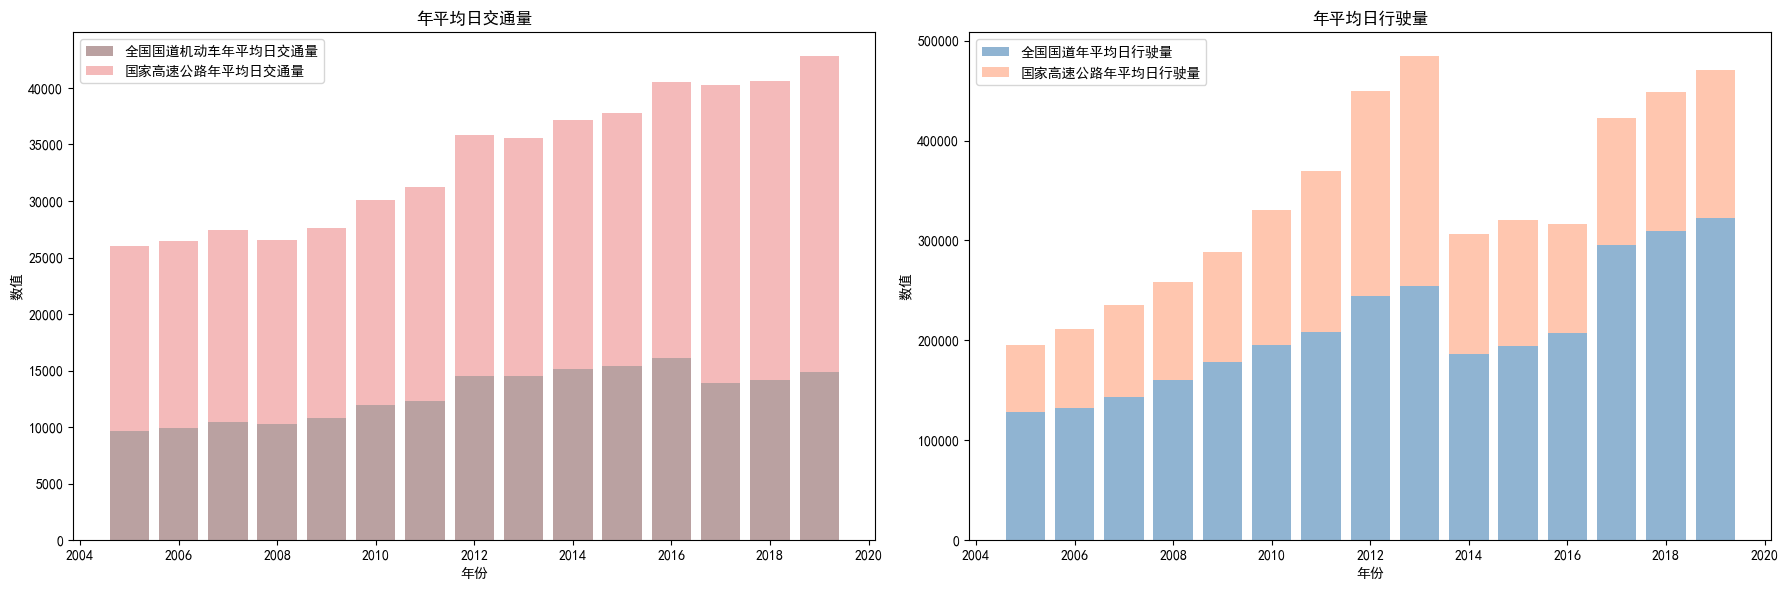

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams['font.sans-serif'] = ['SimHei']  
plt.rcParams['axes.unicode_minus'] = False   

file_path = r"d:\我的文档\桌面\比赛\计设\数据集\VMT指标.xlsx"
df = pd.read_excel(file_path)

# 创建子图，1行2列
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# -------- 图1：年平均日交通量（堆积柱状图） --------
axes[0].bar(df['年份'], df['全国国道机动车年平均日交通量（辆）'], label='全国国道机动车年平均日交通量', alpha=0.6, color='#8d6262')  
axes[0].bar(df['年份'], df['国家高速公路年平均日交通量'], bottom=df['全国国道机动车年平均日交通量（辆）'], label='国家高速公路年平均日交通量', alpha=0.6, color='#ed8d8d')  

axes[0].set_title('年平均日交通量')
axes[0].set_xlabel('年份')
axes[0].set_ylabel('数值')
axes[0].legend()
axes[0].grid(False)

# -------- 图2：年平均日行驶量（堆积柱状图） --------
axes[1].bar(df['年份'], df['全国国道年平均日行驶量（万车公里）'], label='全国国道年平均日行驶量', alpha=0.6, color='#4682b4')  # 蓝色
axes[1].bar(df['年份'], df['国家高速公路年平均日行驶量'], bottom=df['全国国道年平均日行驶量（万车公里）'], label='国家高速公路年平均日行驶量', alpha=0.6, color='#ffa07a')  # 橙色

axes[1].set_title('年平均日行驶量')
axes[1].set_xlabel('年份')
axes[1].set_ylabel('数值')
axes[1].legend()
axes[1].grid(False)

# 调整布局
plt.tight_layout()
plt.savefig('VMT指标.jpg')
plt.show()

In [1]:
import pandas as pd

file_path = r"d:\我的文档\桌面\比赛\计设\数据集\中国各地区公共充电桩数量.xlsx"
df = pd.read_excel(file_path)

df.head()

,省份/直辖市,广东省,上海市,北京市,江苏省,浙江省,山东省,湖北省,安徽省,河南省,...,甘肃省,吉林省,内蒙古自治区,新疆维吾尔族自治区,宁夏回族自治区,青海省,西藏自治区,香港特别行政区,中国澳门,总计
0,2018-12-01,35928,39303,41644,30333,14226,20798,9722,10228,8131,...,2327,733,1224,207,233,445,17,NaN,NaN,299749
1,2019-01-01,35890,41726,46137,34502,19450,25799,11285,11021,9570,...,2648,673,1182,228,302,602,17,NaN,NaN,341759
2,2019-02-01,36034,42415,46862,34919,19684,28059,11327,11404,9706,...,2669,713,1443,286,335,564,17,NaN,NaN,347620
3,2019-03-01,44672,47044,50694,39902,21098,28803,12674,13065,10302,...,2693,822,1500,308,342,632,17,NaN,NaN,383563
4,2019-04-01,45217,47772,51188,40656,21576,29343,12897,13992,10357,...,2797,852,1558,309,387,642,17,NaN,NaN,391026


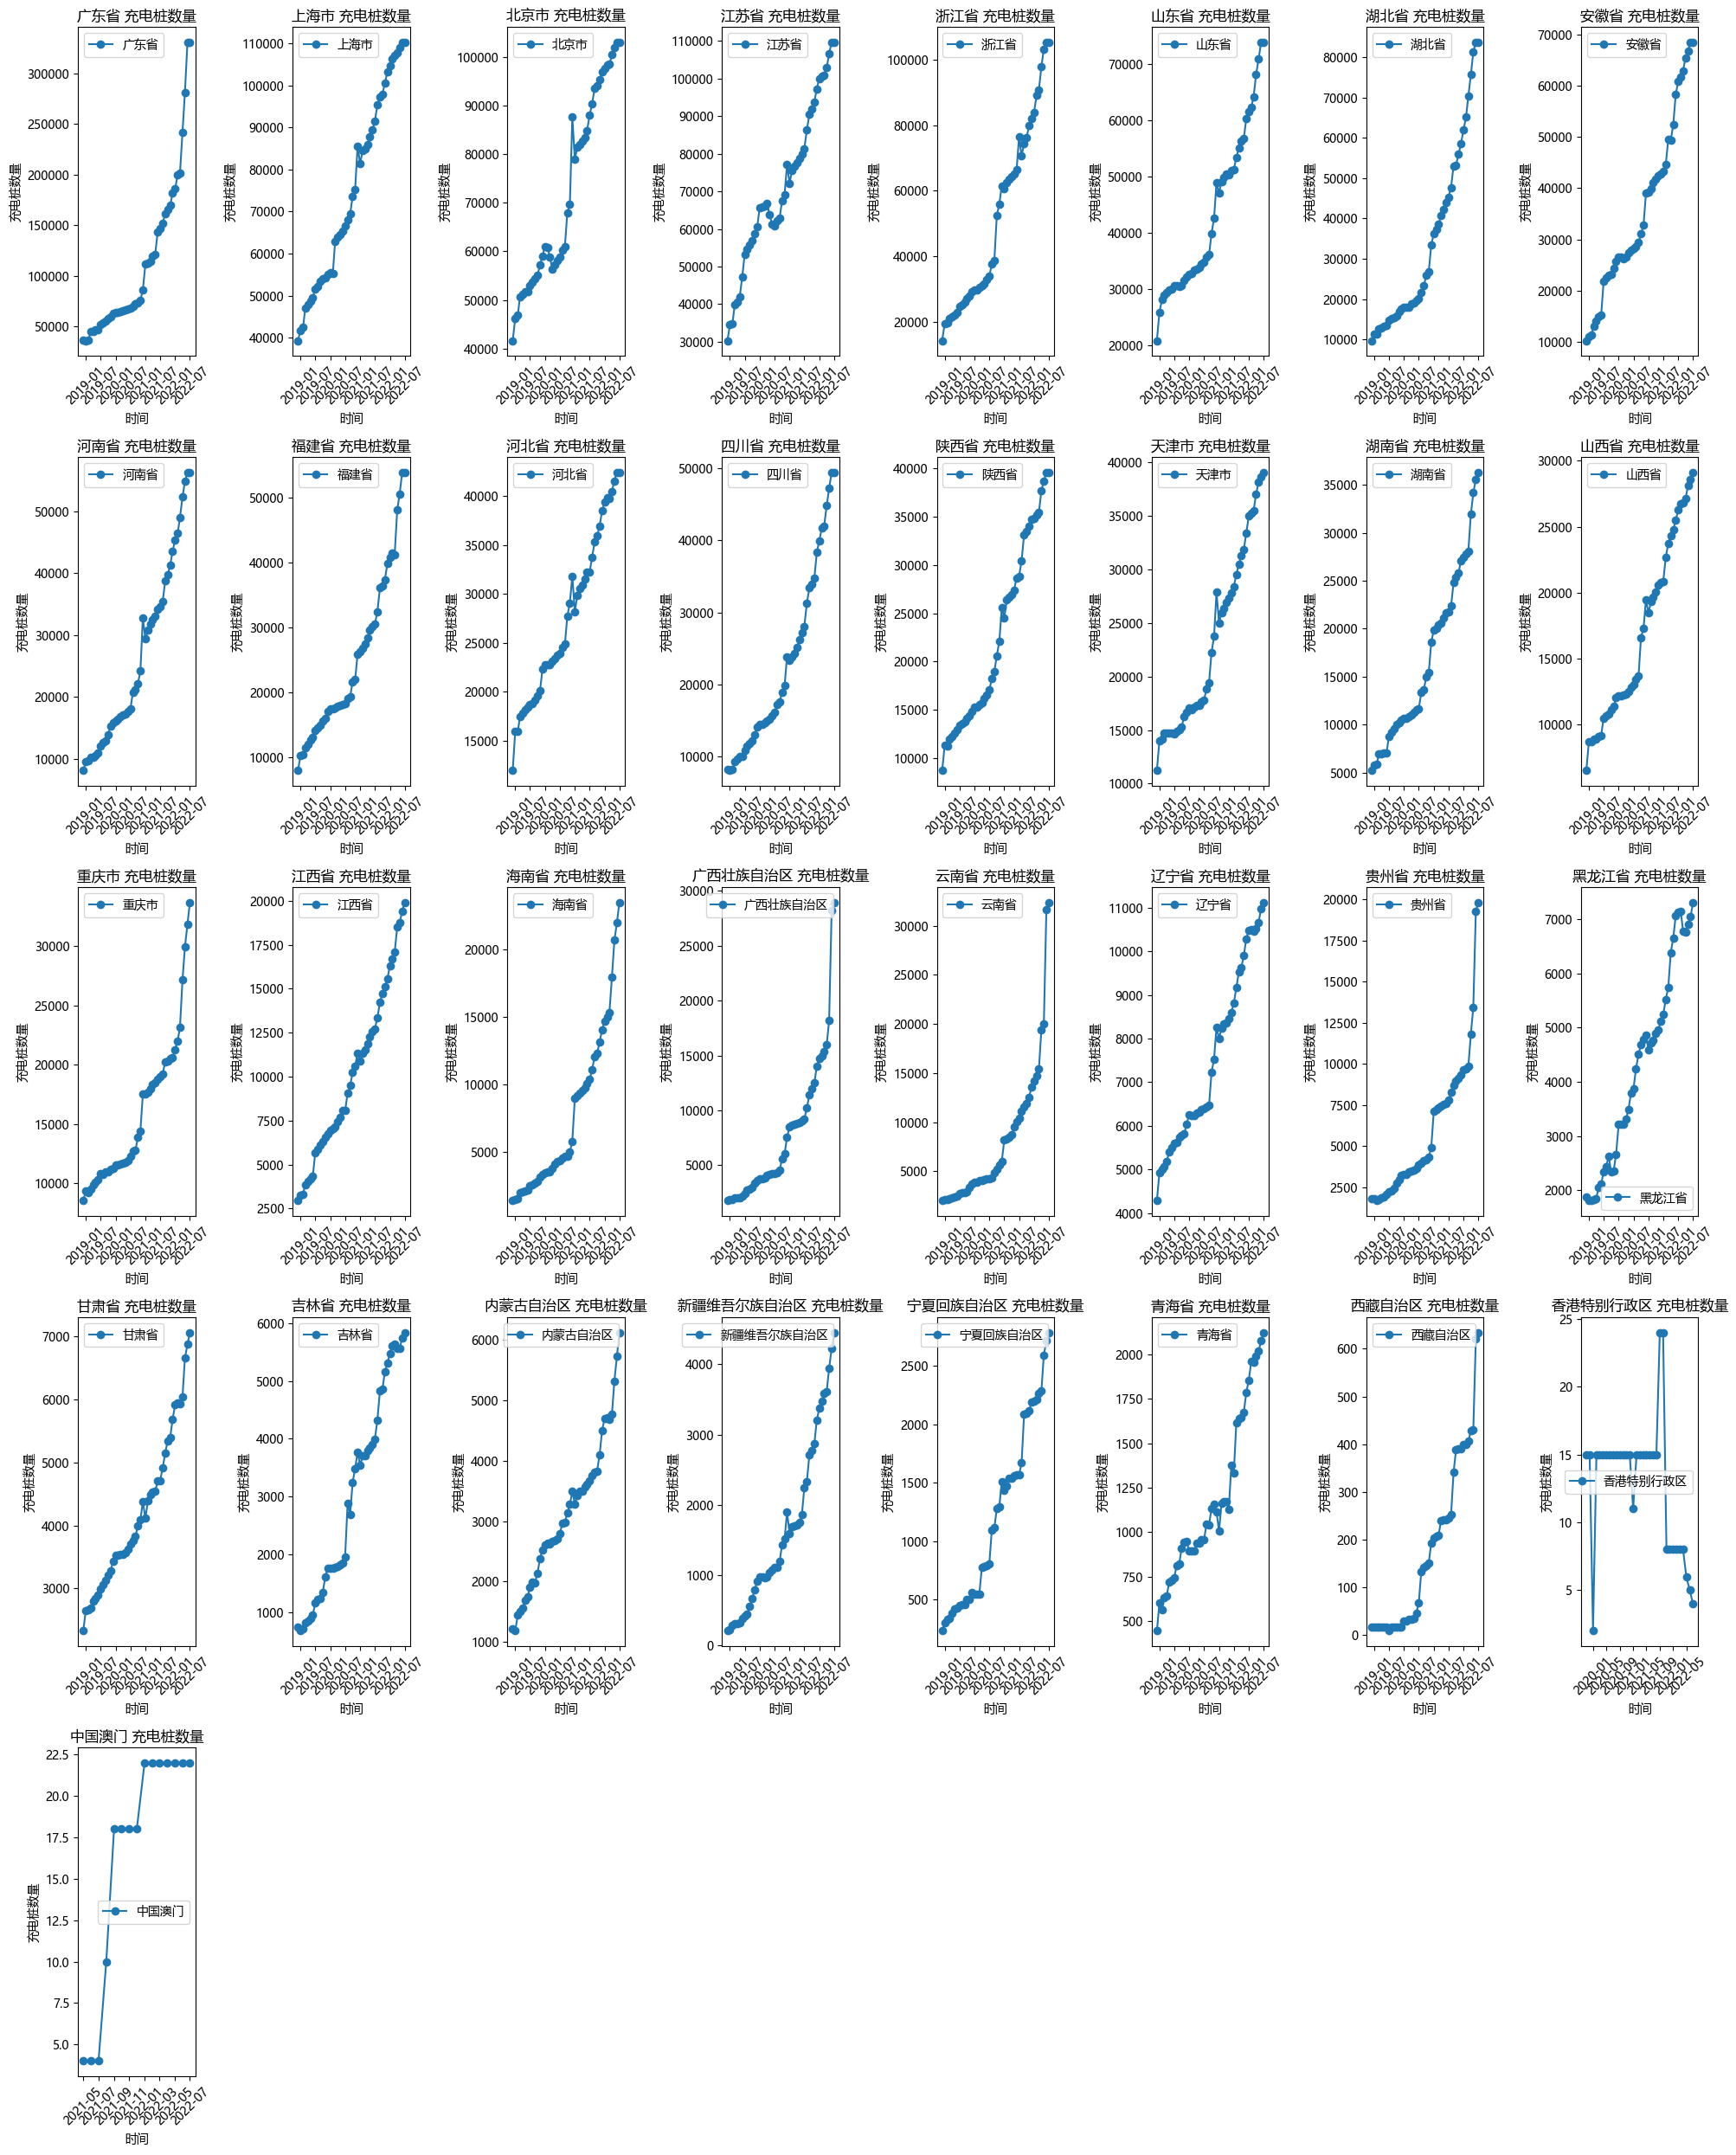

In [2]:
import matplotlib.pyplot as plt

plt.rcParams['font.sans-serif'] = ['Microsoft YaHei']  #
plt.rcParams['axes.unicode_minus'] = False  

# 获取所有省份列（不包含时间）
provinces = df.columns[1:-1]  # 第一列是日期，最后一列是总计，去除这两列

# 计算子图的行数和列数，确保每行展示5个图
n_provinces = len(provinces)
n_cols = 8 # 每行展示5个子图
n_rows = (n_provinces // n_cols) + (n_provinces % n_cols > 0)  # 计算需要的行数

# 创建子图
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, n_rows * 5))

# 如果只有一行，则axes是1维的，需要转换成二维
if n_rows == 1:
    axes = axes.reshape(1, n_cols)

# 扁平化axes以便遍历
axes = axes.flatten()

# 为每个省份绘制子图
for i, province in enumerate(provinces):
    axes[i].plot(df['省份/直辖市'], df[province], marker='o', label=province)
    axes[i].set_title(f'{province} 充电桩数量')
    axes[i].set_xlabel('时间')
    axes[i].set_ylabel('充电桩数量')
    axes[i].tick_params(axis='x', rotation=45)
    axes[i].legend()

# 如果省份比子图数量少，去除多余的子图
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.savefig('充电桩数量.jpg')
plt.show()

In [1]:
import pandas as pd
file_path = r"d:\我的文档\桌面\比赛\计设\数据集\智能驾驶对交通事故的影响.xlsx"
df = pd.read_excel(file_path)

df.head()

,年份,交通事故发生数,私人汽车拥有量
0,2005,303696,1848.07
1,2006,230364,2333.32
2,2007,213666,2876.22
3,2008,176093,3501.39
4,2009,158210,4574.91


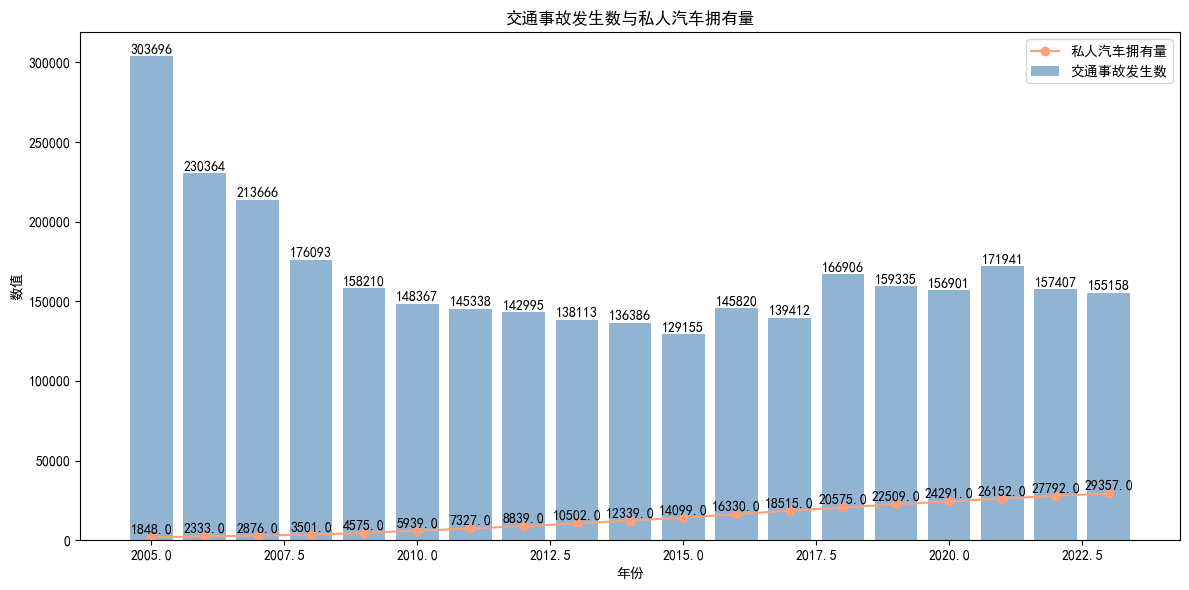

In [11]:
import matplotlib.pyplot as plt

# 设置中文字体
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False  

# 提取相关数据
years = df['年份']
accidents = df['交通事故发生数']
car_ownership = df['私人汽车拥有量']

# 创建一个图，放置两个指标的数据
plt.figure(figsize=(12, 6))

# 交通事故发生数（柱状图）
bars = plt.bar(df['年份'], df['交通事故发生数'], color='#4682b4', label='交通事故发生数', alpha=0.6)

# 在柱状图上显示数字
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 500, round(yval, 0), ha='center', va='bottom', fontsize=10)

# 私人汽车拥有量（折线图）
line, = plt.plot(df['年份'], df['私人汽车拥有量'], marker='o', color='#ffa07a', label='私人汽车拥有量')

# 在折线图上显示数字
for i, txt in enumerate(car_ownership):
    plt.text(years[i], car_ownership[i] + 1000, round(txt, 0), ha='center', va='bottom', fontsize=10)

# 设置标题和标签
plt.title('交通事故发生数与私人汽车拥有量')
plt.xlabel('年份')
plt.ylabel('数值')

# 添加图例
plt.legend()

# 显示网格
plt.grid(False)

# 调整布局
plt.tight_layout()

# 显示图表
plt.savefig('交通事故与私人汽车拥有量.jpg')
plt.show()

In [1]:
# SD模型
import pandas as pd

file_path = "SD相关参数.xlsx"
df_input = pd.read_excel(r"d:\我的文档\桌面\比赛\计设\数据集\SD相关参数.xlsx")

df_input.head()

,年份,BEV数量,PHEV数量,HEV数量,ICE数量,充电桩数量
0,2017,65570,5751,114750,3620700,3010870
1,2018,157217,14461,208180,3668240,5096871
2,2019,231752,19987,231880,3732880,8300611
3,2020,362556,22880,230120,3821180,8393814
4,2021,441283,32331,225540,3997500,18328013


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import MaxNLocator

# 参数定义
ENERGY_CONSUMPTION = {
    "新能源车": {"电": 13.5},
    "燃油车": {"油": 8.2},
    "油电混合车": {"油": 8, "电": 2.5}
}

ANNUAL_MILEAGE = {
    "新能源车": 12000,
    "燃油车": 8000,
    "油电混合车": 10000
}

ENERGY_COEF = {"电": 0.1229, "油": 1.4714}
EMISSION_FACTOR = {"电": 0.997, "油": 2.925}
GASOLINE_DENSITY = 0.74
PILES_PER_EV = 0.1

# 情景参数
scenarios = {
    '基准情景': {
        'NEV年增长率': 0.05,
        'CV年衰减率': 0.01,
        'NEV能耗下降率': 0.01,
        'CV能耗下降率': 0.005,
        '电排放因子下降率': 0.005,
        '桩增长数': 5000
    },
    '低碳情景': {
        'NEV年增长率': 0.10,
        'CV年衰减率': 0.02,
        'NEV能耗下降率': 0.015,
        'CV能耗下降率': 0.01,
        '电排放因子下降率': 0.01,
        '桩增长数': 10000
    }
}

# 读取历史数据
df_hist_input = df_input[df_input["年份"] <= 2023].copy()
df_hist_input.rename(columns={
    "BEV数量": "BEV", "PHEV数量": "PHEV",
    "HEV数量": "HEV", "ICE数量": "ICE",
    "充电桩数量": "充电桩"
}, inplace=True)
df_hist_input["新能源车"] = df_hist_input["BEV"] + df_hist_input["PHEV"]
df_hist_input["燃油车"] = df_hist_input["HEV"] + df_hist_input["ICE"]
df_hist_input["混合动力车"] = 0
df_hist_input["总车辆数"] = df_hist_input["新能源车"] + df_hist_input["燃油车"]

# 历史阶段计算
def calc_energy_emission(vehicle_type):
    mileage = ANNUAL_MILEAGE[vehicle_type]
    energy = ENERGY_CONSUMPTION[vehicle_type]
    coal = emis = 0
    if "电" in energy:
        kwh = (mileage / 100) * energy["电"]
        coal += kwh * ENERGY_COEF["电"]
        emis += kwh * EMISSION_FACTOR["电"]
    if "油" in energy:
        liters = (mileage / 100) * energy["油"]
        kg = liters * GASOLINE_DENSITY
        coal += kg * ENERGY_COEF["油"]
        emis += liters * EMISSION_FACTOR["油"]
    return coal, emis

hist_results = []
for _, row in df_hist_input.iterrows():
    year = int(row["年份"])
    nev_num = int(row["新能源车"])
    cv_num = int(row["燃油车"])
    mix_num = int(row["混合动力车"])
    charging_piles = int(row["充电桩"])

    coal_nev, emis_nev = calc_energy_emission("新能源车")
    coal_cv, emis_cv = calc_energy_emission("燃油车")
    coal_mix, emis_mix = calc_energy_emission("油电混合车")

    max_ev_supported = int(charging_piles * PILES_PER_EV)
    actual_nev = min(nev_num, max_ev_supported)
    overflow_nev = max(nev_num - actual_nev, 0)

    total_coal = actual_nev * coal_nev + overflow_nev * coal_cv + cv_num * coal_cv + mix_num * coal_mix
    total_emis = actual_nev * emis_nev + overflow_nev * emis_cv + cv_num * emis_cv + mix_num * emis_mix

    hist_results.append({
        "情景": "历史数据",
        "年份": year,
        "总标准煤消耗": total_coal,
        "总碳排放": total_emis
    })

df_hist_result = pd.DataFrame(hist_results)

# 预测阶段
nev_2023 = int(df_hist_input[df_hist_input['年份'] == 2023]['新能源车'].values[0])
cv_2023 = int(df_hist_input[df_hist_input['年份'] == 2023]['燃油车'].values[0])
mix_2023 = 0
charging_piles_2023 = int(df_hist_input[df_hist_input['年份'] == 2023]['充电桩'].values[0])
years = list(range(2023, 2031))

forecast_results_v2 = []

for scene, config in scenarios.items():
    nev_num = nev_2023
    cv_num = cv_2023
    mix_num = mix_2023
    charging_piles = charging_piles_2023

    for year in years:
        if year <= 2023:
            continue
        year_diff = year - 2023

        e_nev = ENERGY_CONSUMPTION["新能源车"]["电"] * (1 - config["NEV能耗下降率"]) ** year_diff
        e_cv = ENERGY_CONSUMPTION["燃油车"]["油"] * (1 - config["CV能耗下降率"]) ** year_diff
        e_mix_e = ENERGY_CONSUMPTION["油电混合车"]["电"] * (1 - config["NEV能耗下降率"]) ** year_diff
        e_mix_o = ENERGY_CONSUMPTION["油电混合车"]["油"] * (1 - config["CV能耗下降率"]) ** year_diff

        em_elec = EMISSION_FACTOR["电"] * (1 - config["电排放因子下降率"]) ** year_diff
        em_oil = EMISSION_FACTOR["油"]

        def calc(vehicle_type, e_dict, em_dict):
            mileage = ANNUAL_MILEAGE[vehicle_type]
            coal = emis = 0
            if "电" in e_dict:
                kwh = (mileage / 100) * e_dict["电"]
                coal += kwh * ENERGY_COEF["电"]
                emis += kwh * em_dict["电"]
            if "油" in e_dict:
                liters = (mileage / 100) * e_dict["油"]
                kg = liters * GASOLINE_DENSITY
                coal += kg * ENERGY_COEF["油"]
                emis += liters * em_dict["油"]
            return coal, emis

        coal_nev, emis_nev = calc("新能源车", {"电": e_nev}, {"电": em_elec})
        coal_cv, emis_cv = calc("燃油车", {"油": e_cv}, {"油": em_oil})
        coal_mix, emis_mix = calc("油电混合车", {"电": e_mix_e, "油": e_mix_o}, {"电": em_elec, "油": em_oil})

        max_ev_supported = int(charging_piles * PILES_PER_EV)
        actual_nev = min(nev_num, max_ev_supported)
        overflow_nev = max(nev_num - actual_nev, 0)

        total_coal = actual_nev * coal_nev + overflow_nev * coal_cv + cv_num * coal_cv + mix_num * coal_mix
        total_emis = actual_nev * emis_nev + overflow_nev * emis_cv + cv_num * emis_cv + mix_num * emis_mix

        forecast_results_v2.append({
            "情景": scene,
            "年份": year,
            "总标准煤消耗": total_coal,
            "总碳排放": total_emis
        })

        nev_num = int(nev_num * (1 + config['NEV年增长率']))
        cv_num = int(cv_num * (1 - config['CV年衰减率']))
        charging_piles += config['桩增长数']

# 带有2023年的预测应用点
df_forecast_v2 = pd.DataFrame(forecast_results_v2)
df_forecast_v2_2023 = df_forecast_v2[df_forecast_v2["年份"] == 2024].copy()
df_forecast_v2_2023["年份"] = 2023
df_all_v2 = pd.concat([df_hist_result, df_forecast_v2_2023, df_forecast_v2], ignore_index=True)

D:\Tools\Anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\Tools\Anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


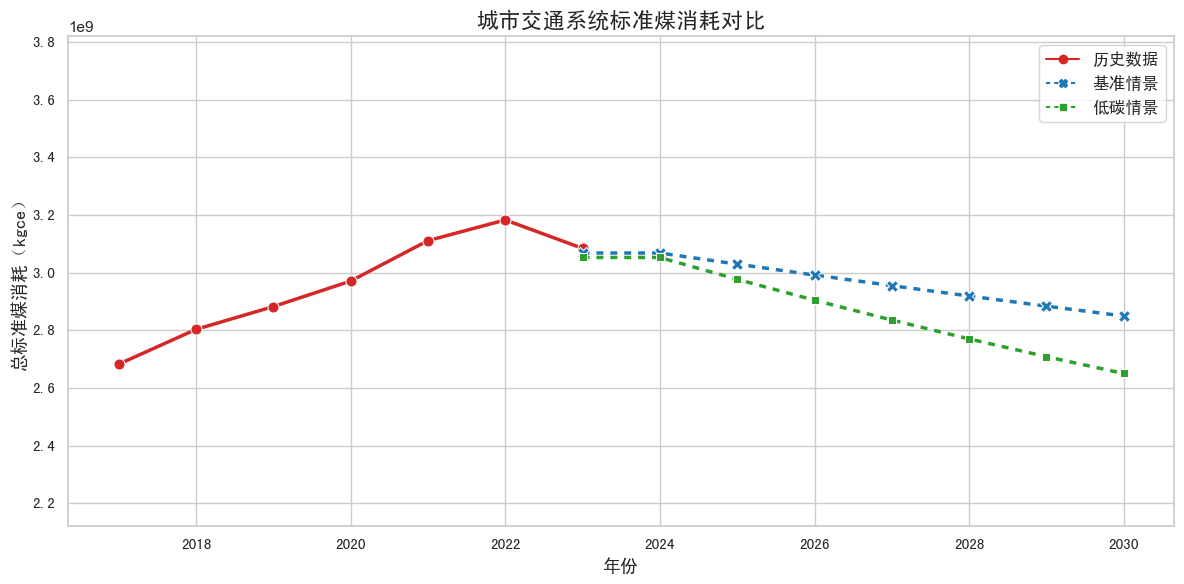

D:\Tools\Anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\Tools\Anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Administrator\AppData\Local\Temp\ipykernel_3872\2110100314.py:65: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from current font.
  plt.tight_layout()
C:\Users\Administrator\AppData\Local\Temp\ipykernel_3872\2110100314.py:66: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from current font.
  plt.savefig('碳排放.jpg')
D:\Tools\Anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from current font.
  

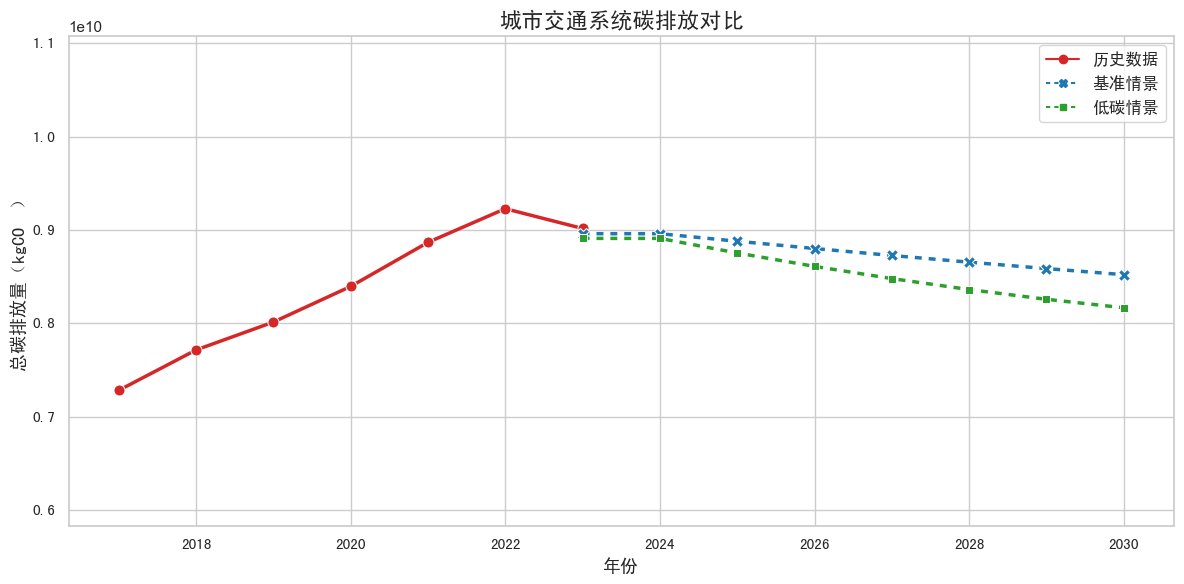

In [14]:
from matplotlib.font_manager import FontProperties

# 设置字体路径
font = FontProperties(fname="Ubuntu_18.04_SimHei.ttf")

sns.set_theme(style="whitegrid")
palette = {"历史数据": "#D62728", "基准情景": "#1F77B4", "低碳情景": "#2CA02C"}

# -------- 标准煤图 --------
plt.figure(figsize=(12, 6))
sns.lineplot(
    data=df_all_v2,
    x="年份",
    y="总标准煤消耗",
    hue="情景",
    style="情景",
    linewidth=2.5,
    markers=True,
    markersize=8,
    dashes={"历史数据": "", "基准情景": (2, 2), "低碳情景": (2, 2)},
    palette=palette
)
plt.title("城市交通系统标准煤消耗对比", fontproperties=font, fontsize=16)
plt.ylabel("总标准煤消耗（kgce）", fontproperties=font, fontsize=13)
plt.xlabel("年份", fontproperties=font, fontsize=13)
plt.xticks(fontproperties=font, fontsize=11)
plt.yticks(fontproperties=font, fontsize=11)
min_coal = df_all_v2["总标准煤消耗"].min()
max_coal = df_all_v2["总标准煤消耗"].max()
plt.ylim(bottom=min_coal * 0.8, top=max_coal * 1.2)

# 设置图例的字体
plt.legend(fontsize=12, title_fontsize=14, prop=font)

plt.tight_layout()
plt.savefig('煤消耗.jpg')
plt.show()

# -------- 碳排放图 --------
plt.figure(figsize=(12, 6))
sns.lineplot(
    data=df_all_v2,
    x="年份",
    y="总碳排放",
    hue="情景",
    style="情景",
    linewidth=2.5,
    markers=True,
    markersize=8,
    dashes={"历史数据": "", "基准情景": (2, 2), "低碳情景": (2, 2)},
    palette=palette
)
plt.title("城市交通系统碳排放对比", fontproperties=font, fontsize=16)
plt.ylabel("总碳排放量（kgCO₂）", fontproperties=font, fontsize=13)
plt.xlabel("年份", fontproperties=font, fontsize=13)
plt.xticks(fontproperties=font, fontsize=11)
plt.yticks(fontproperties=font, fontsize=11)
min_emis = df_all_v2["总碳排放"].min()
max_emis = df_all_v2["总碳排放"].max()
plt.ylim(bottom=min_emis * 0.8, top=max_emis * 1.2)

# 设置图例的字体
plt.legend(fontsize=12, title_fontsize=14, prop=font)

plt.tight_layout()
plt.savefig('碳排放.jpg')
plt.show()

In [2]:
pip install snapshot-selenium selenium pyecharts

   ---------------------------------------- 0.0/9.4 MB ? eta -:--:--
   ---------------------------------------- 0.1/9.4 MB 1.1 MB/s eta 0:00:09
   ---------------------------------------- 0.1/9.4 MB 1.1 MB/s eta 0:00:09
    --------------------------------------- 0.1/9.4 MB 901.1 kB/s eta 0:00:11
    --------------------------------------- 0.2/9.4 MB 980.4 kB/s eta 0:00:10
    --------------------------------------- 0.2/9.4 MB 958.4 kB/s eta 0:00:10
   - -------------------------------------- 0.3/9.4 MB 1.1 MB/s eta 0:00:08
   - -------------------------------------- 0.3/9.4 MB 967.8 kB/s eta 0:00:10
   - -------------------------------------- 0.3/9.4 MB 967.8 kB/s eta 0:00:10
   -- ------------------------------------- 0.5/9.4 MB 1.1 MB/s eta 0:00:08
   -- ------------------------------------- 0.6/9.4 MB 1.3 MB/s eta 0:00:07
   -- ------------------------------------- 0.6/9.4 MB 1.3 MB/s eta 0:00:07
   -- ------------------------------------- 0.6/9.4 MB 1.2 MB/s eta 0:00:08
   --- --

In [1]:
# 新能源基础设施建设情况
import pandas as pd 
from pyecharts import options as opts
from pyecharts.charts import Map
from pyecharts.globals import ThemeType
from snapshot_selenium import snapshot
from pyecharts.render import make_snapshot

# 读取 Excel 文件
df_2 = pd.read_excel(r"d:\我的文档\桌面\比赛\计设\数据集\中国各区域公共类充电桩保有量（万个）.xlsx", sheet_name='Sheet1')

# 由于每年的数据以月份为单位，首先将数据按年份进行汇总
df_2['年份'] = pd.to_datetime(df_2['年份']).dt.year

# 按年份汇总每个月的数据
df_yearly_sum = df_2.groupby('年份').sum()

# 删除总计列（'总计'列是每年所有省份的总和，非每个省份的单独数据）
df_yearly_sum = df_yearly_sum.drop(columns=['总计'])
df_yearly_sum.head()

,广东省,上海市,北京市,江苏省,浙江省,山东省,湖北省,安徽省,河南省,福建省,...,黑龙江省,甘肃省,吉林省,内蒙古自治区,新疆维吾尔族自治区,宁夏回族自治区,青海省,西藏自治区,香港特别行政区,中国澳门
年份,,,,,,,,,,,,,,,,,,,,,
2018,35928,39303,41644,30333,14226,20798,9722,10228,8131,7942,...,1883,2327,733,1224,207,233,445,17,0.0,0.0
2019,595737,597428,630846,578875,286539,357699,170362,219954,144562,162277,...,26240,35627,13227,22042,5631,5147,9075,201,30.0,0.0
2020,835754,805555,757587,789015,465777,437991,262785,349887,240816,232909,...,47202,45076,28784,34576,14265,11095,11973,1045,167.0,0.0
2021,1697420,1099621,1051283,1001486,842656,630640,553182,544550,424985,381753,...,65704,57957,50969,44538,26436,20822,16710,3354,180.0,94.0
2022,1771252,755485,702500,730316,676206,474698,521976,454825,360384,330473,...,49107,44406,39431,36043,26664,17038,13981,3319,47.0,154.0


In [2]:
import pandas as pd 
from pyecharts import options as opts
from pyecharts.charts import Map
from pyecharts.globals import ThemeType
from snapshot_selenium import snapshot
from pyecharts.render import make_snapshot

# 读取 Excel 文件
df_2 = pd.read_excel(r"d:\我的文档\桌面\比赛\计设\数据集\中国各区域公共类充电桩保有量（万个）.xlsx", sheet_name='Sheet1')

# 省份顺序
provinces_order = [
    '北京市', '天津市', '河北省', '山西省', '内蒙古自治区', '辽宁省', '吉林省', '黑龙江省', 
    '上海市', '江苏省', '浙江省', '安徽省', '福建省', '江西省', '山东省', '河南省', '湖北省', 
    '湖南省', '广东省', '广西壮族自治区', '海南省', '重庆市', '四川省', '贵州省', '云南省', 
    '西藏自治区', '陕西省', '甘肃省', '青海省', '宁夏回族自治区', '新疆维吾尔族自治区', 
    '香港特别行政区', '中国澳门'
]

# 提取年份和省份相关列（去除总计列）
df_filtered = df_2[['年份'] + provinces_order]

# 将年份列转换为年份格式
df_filtered['年份'] = pd.to_datetime(df_filtered['年份']).dt.year

# 按年份对数据进行汇总
df_yearly_sum = df_filtered.groupby('年份').sum()

# 转置数据框，使省份为行，年份为列
df_pivoted = df_yearly_sum.T

# 按照省份顺序重新排列行
df_pivoted = df_pivoted.loc[provinces_order]
df_pivoted

C:\Users\Administrator\AppData\Local\Temp\ipykernel_11176\1440440985.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['年份'] = pd.to_datetime(df_filtered['年份']).dt.year


年份,2018,2019,2020,2021,2022
北京市,41644.0,630846.0,757587.0,1051283.0,702500.0
天津市,11209.0,179932.0,233273.0,344078.0,258437.0
河北省,11957.0,222539.0,300602.0,395822.0,285699.0
山西省,6500.0,120001.0,167653.0,260569.0,192796.0
内蒙古自治区,1224.0,22042.0,34576.0,44538.0,36043.0
辽宁省,4280.0,65686.0,80033.0,107280.0,74709.0
吉林省,733.0,13227.0,28784.0,50969.0,39431.0
黑龙江省,1883.0,26240.0,47202.0,65704.0,49107.0
上海市,39303.0,597428.0,805555.0,1099621.0,755485.0
江苏省,30333.0,578875.0,789015.0,1001486.0,730316.0


In [3]:
df_pivoted.to_excel("充电桩.xlsx", index=False)

图片保存为：charging_piles_map_2018.png


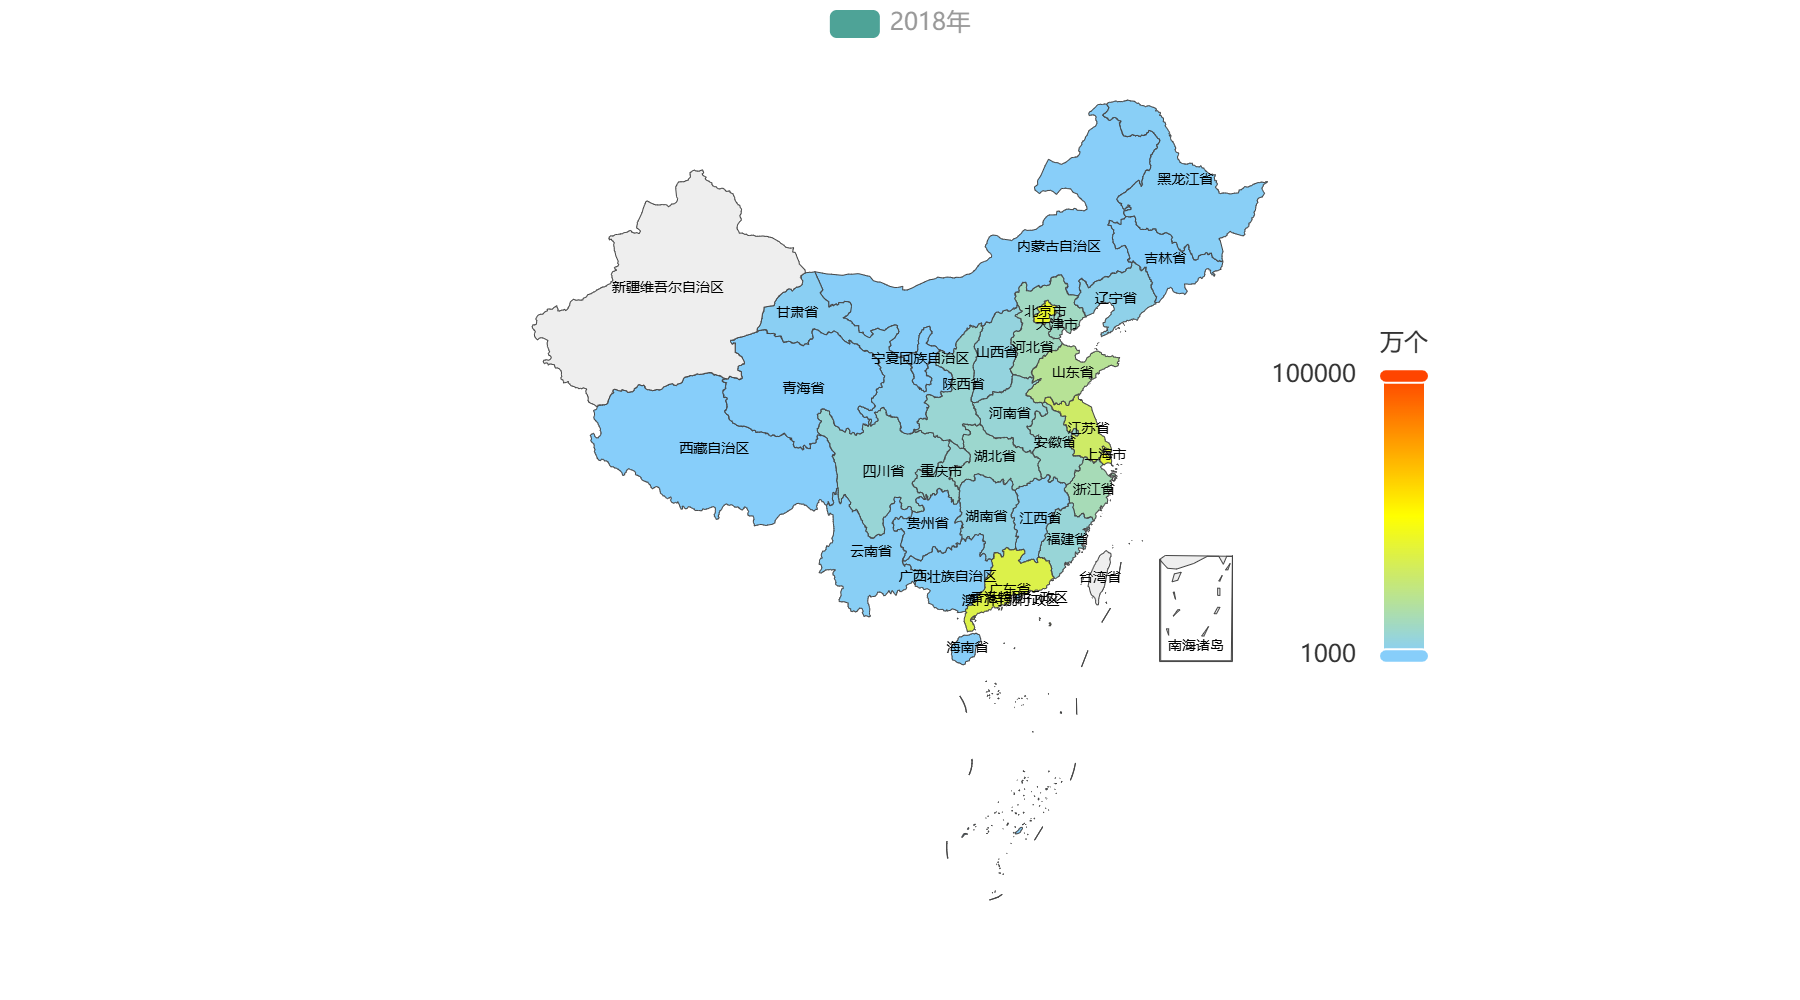

图片保存为：charging_piles_map_2019.png


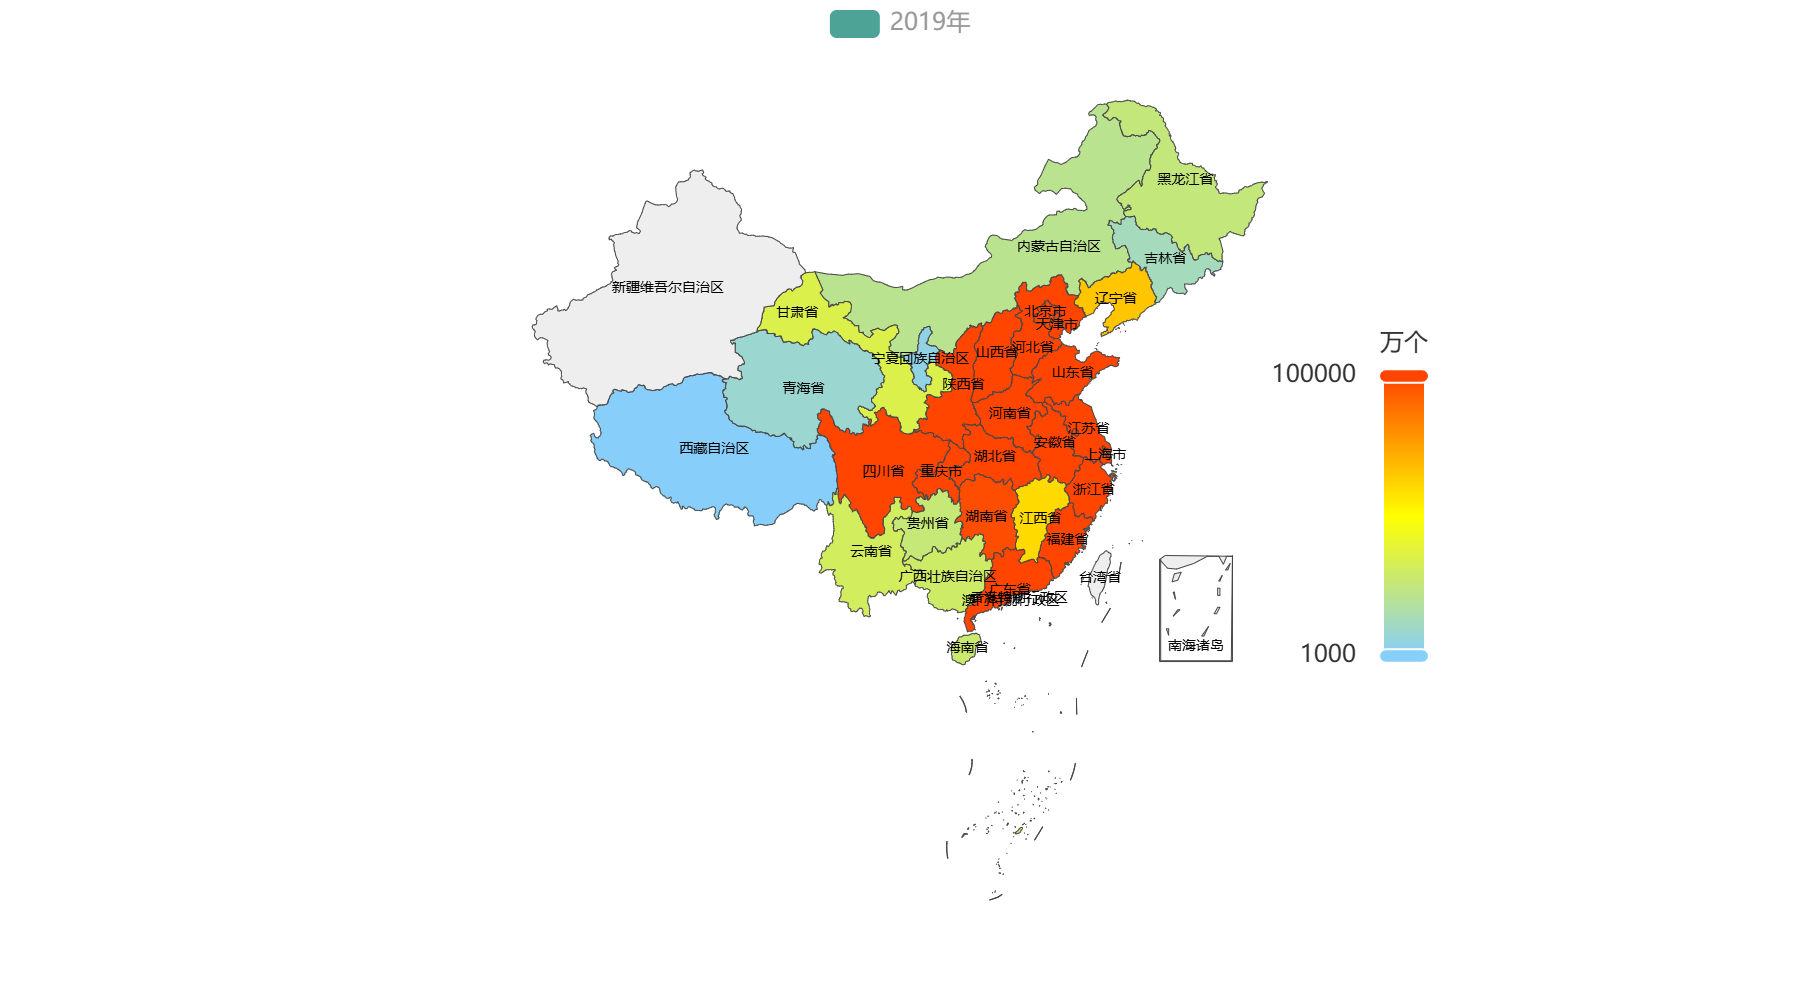

图片保存为：charging_piles_map_2020.png


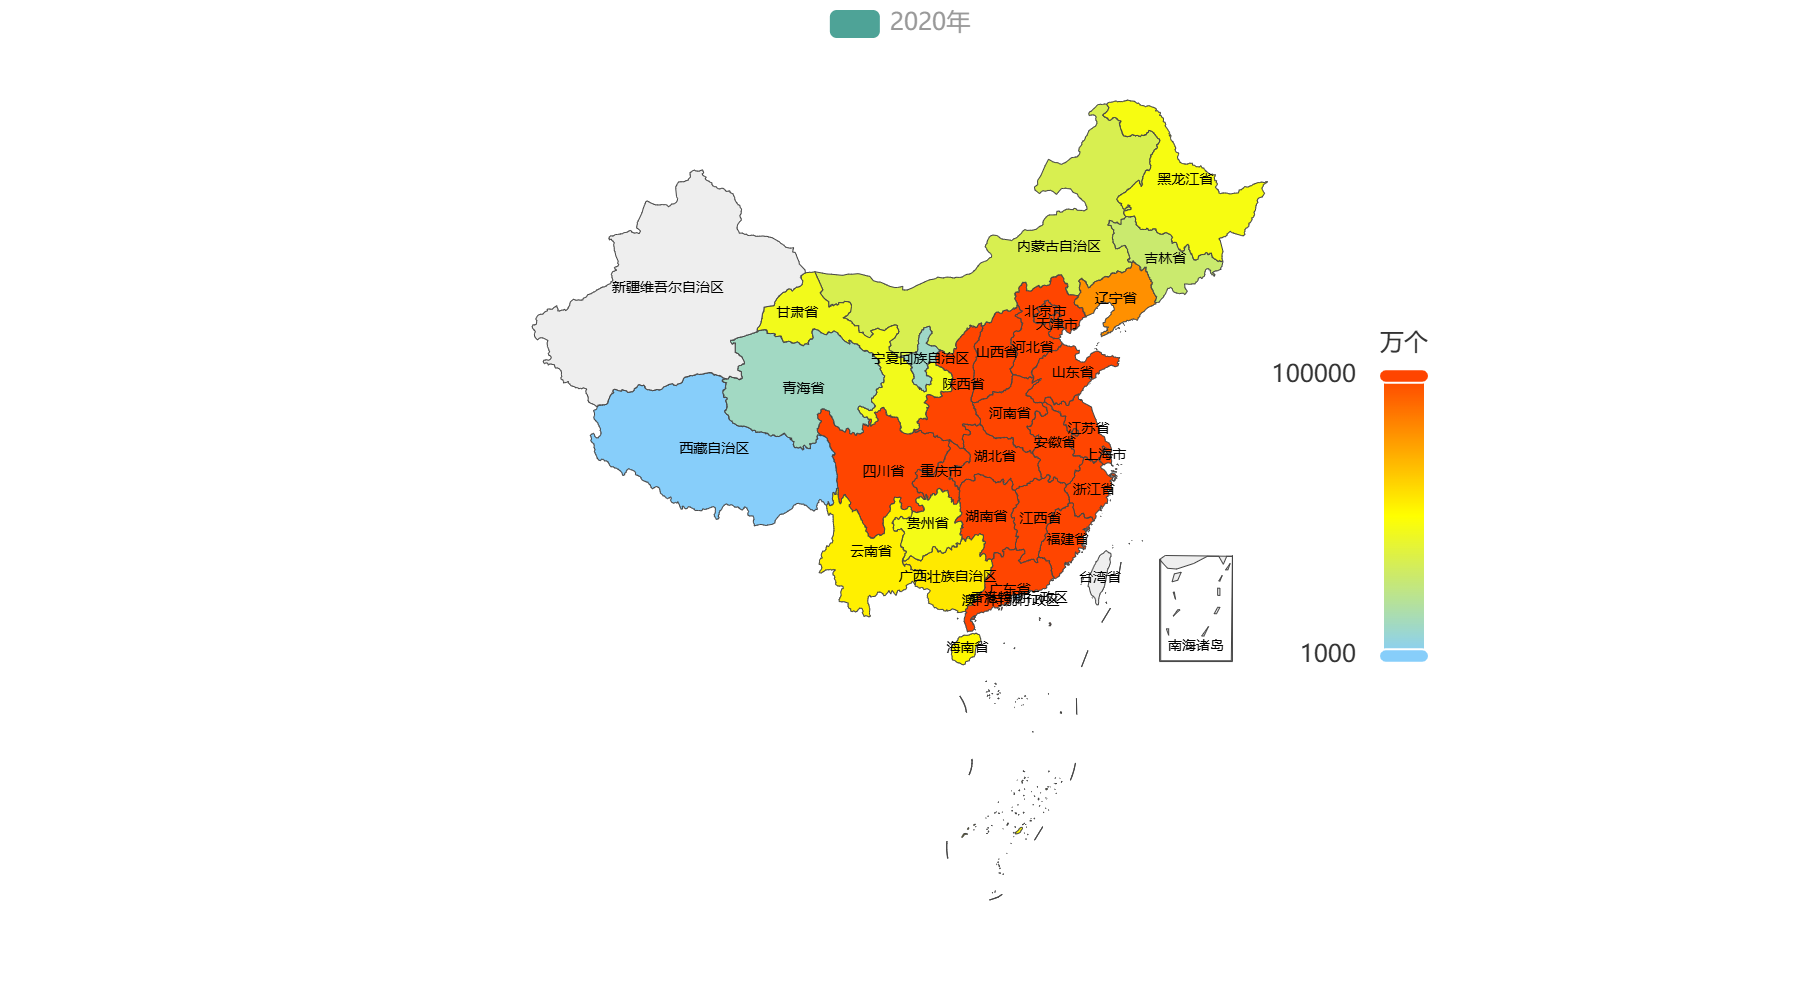

图片保存为：charging_piles_map_2021.png


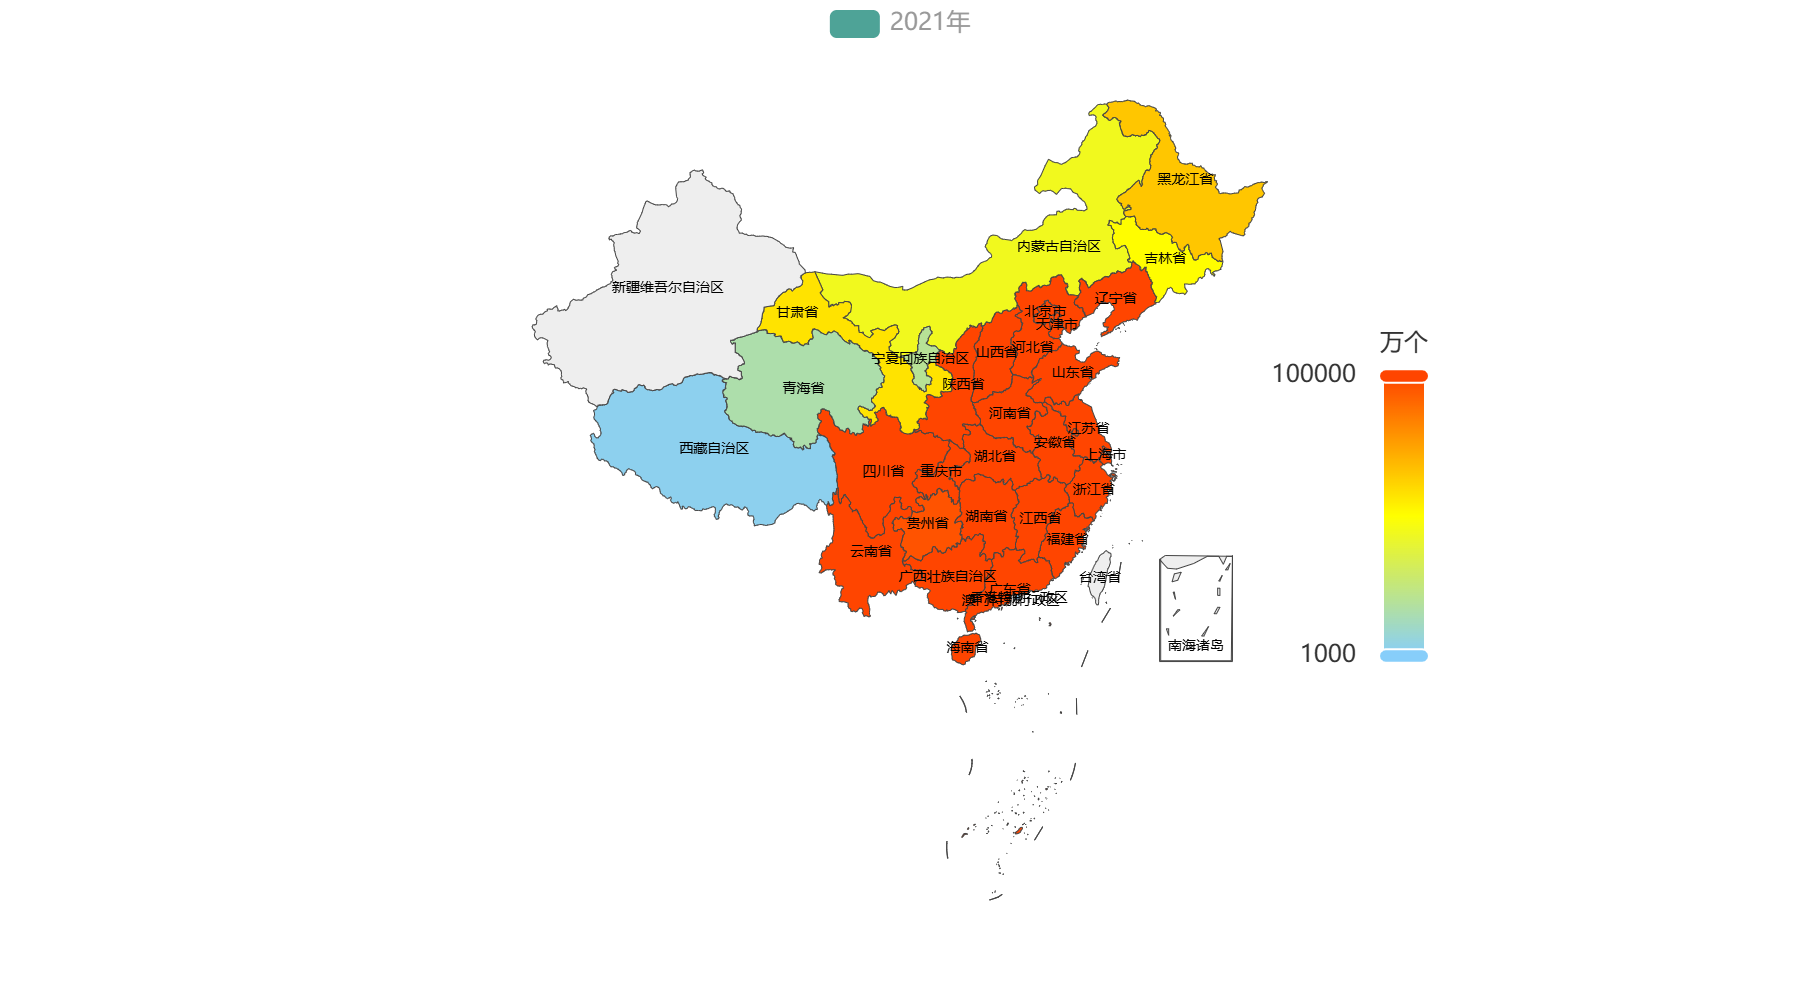

图片保存为：charging_piles_map_2022.png


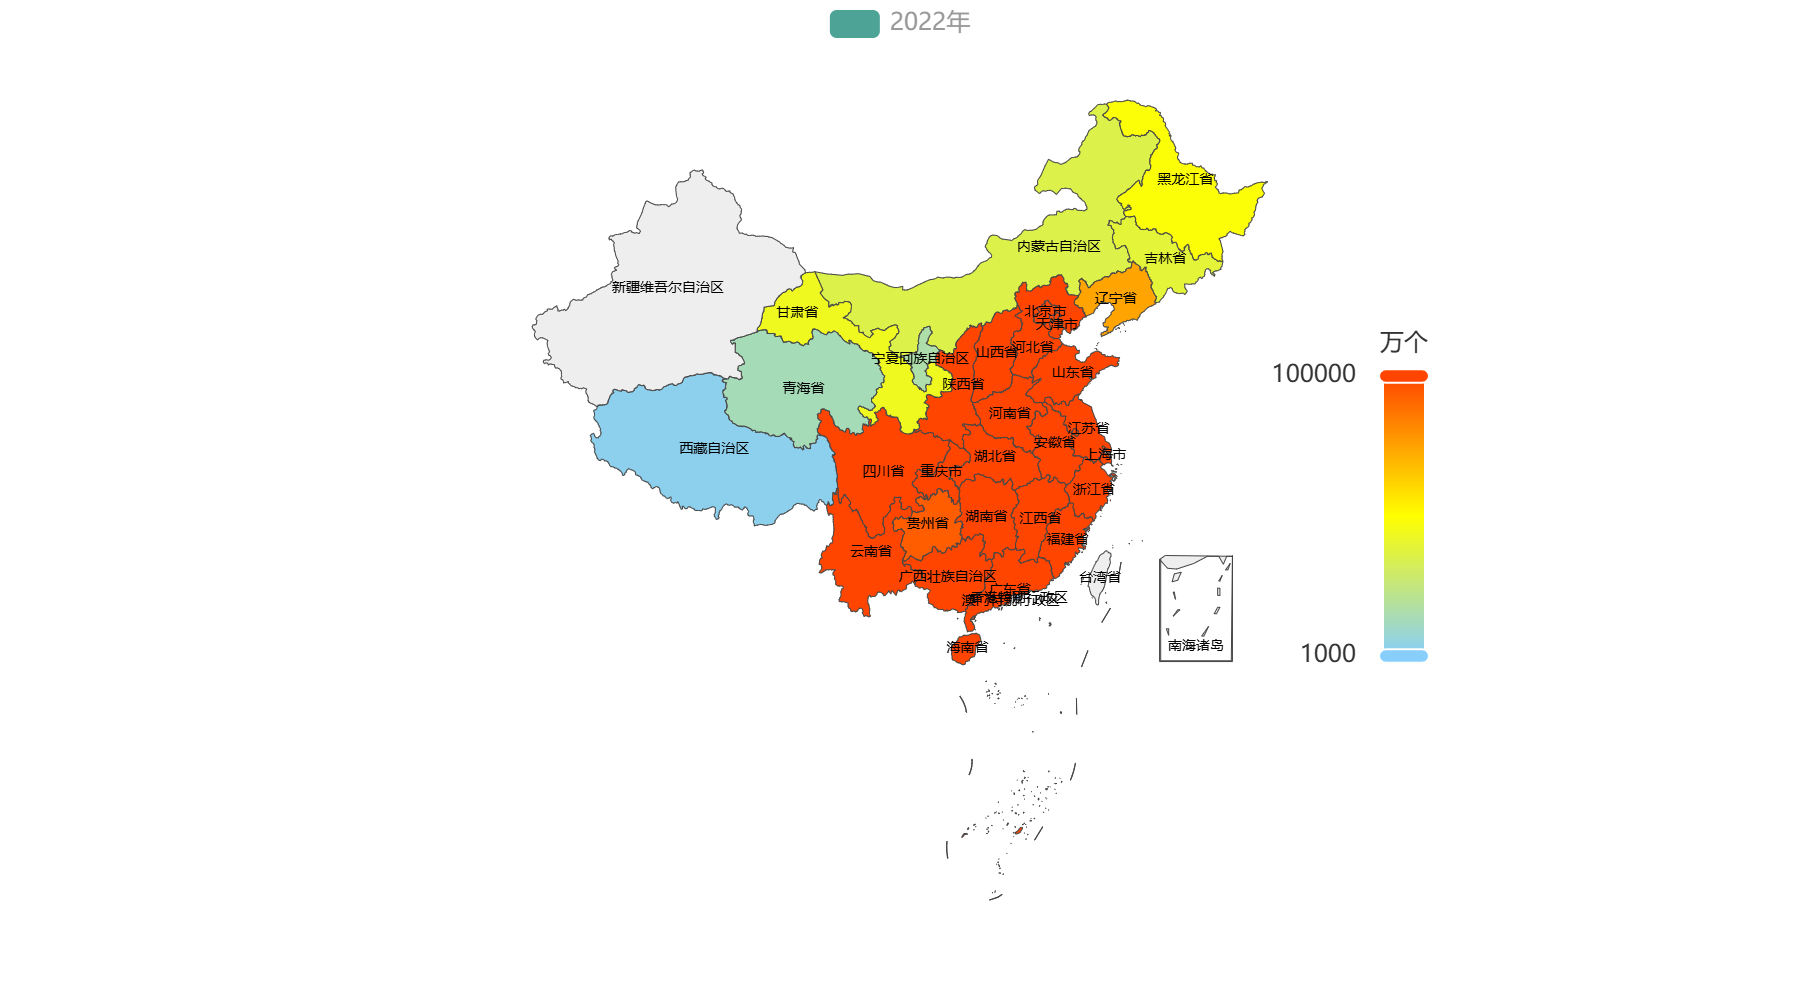

In [3]:
from IPython.display import Image, display

# 创建地图绘制函数
def map_visualmap(data, year) -> Map:
    c = (
        Map(init_opts=opts.InitOpts(theme=ThemeType.WONDERLAND))
        .add(series_name=f"{year}年", data_pair=list(zip(data['Region'], data['Charging_Piles'])), maptype="china")
        .set_global_opts(
            tooltip_opts=opts.TooltipOpts(trigger="item", formatter="{b}<br/>{c} (万个)"),
            visualmap_opts=opts.VisualMapOpts(min_=1000,
                                              max_=100000,
                                              range_text=["万个"],
                                              is_calculable=True,
                                              range_color=["lightskyblue", "yellow", "orangered"],
                                              is_piecewise=False, pos_top="center", pos_right="20%")
        )
        .set_series_opts(label_opts=opts.LabelOpts(is_show=True, font_size=7), showLegendSymbol=False)
    )
    return c

# 为每一年的数据绘制地图并保存为图片
for year in df_yearly_sum.index:
    # 提取每年对应的数据
    yearly_data = df_yearly_sum.loc[year].reset_index()
    yearly_data.columns = ['Region', 'Charging_Piles']
    
    # 绘制地图
    map_charging_piles = map_visualmap(yearly_data, year)
    
    # 保存为图片
    image_path = f"charging_piles_map_{year}.png"
    make_snapshot(snapshot, map_charging_piles.render(), image_path)
    print(f"图片保存为：{image_path}")
    display(Image(filename=image_path))

In [2]:
# 交通发展水平
# 熵权法赋权重
import pandas as pd
import numpy as np

file_path = r"d:\我的文档\桌面\比赛\计设\数据集\交通发展水平相关指标.xlsx"
df = pd.read_excel(file_path, sheet_name='Sheet1')

data = df.drop(columns=['年份'])

# 归一化
normalized_data = (data - data.min()) / (data.max() - data.min())

# 计算每个指标的熵值
entropy = -np.sum(normalized_data * np.log(normalized_data + 1e-10), axis=0) / np.log(normalized_data.shape[0])

# 计算每个指标的权重（1 - 标准化熵）
weights = (1 - entropy) / np.sum(1 - entropy)


weights_df = pd.DataFrame({
    'Indicator': data.columns,
    'Entropy': entropy,
    'Weight': weights
})
weights_df

,Indicator,Entropy,Weight
铁路营业里程(万公里),铁路营业里程(万公里),0.939932,0.021336
公路里程(万公里),公路里程(万公里),0.906322,0.033274
内河航道里程(万公里),内河航道里程(万公里),1.036305,-0.012896
定期航班航线里程(万公里),定期航班航线里程(万公里),0.872925,0.045137
国家铁路客车拥有量(辆),国家铁路客车拥有量(辆),0.686777,0.111256
公路营运汽车拥有量(万辆),公路营运汽车拥有量(万辆),0.775457,0.079757
民用机动运输船数(艘),民用机动运输船数(艘),0.871808,0.045533
民用飞机架数(架),民用飞机架数(架),0.838839,0.057244
公路客运量(万人),公路客运量(万人),0.781185,0.077722
公路货运量(万吨),公路货运量(万吨),0.861650,0.049142


In [3]:
# TOPSIS评价
# 定义六个维度及其对应的指标
infrastructure = ['铁路营业里程(万公里)', '公路里程(万公里)', '内河航道里程(万公里)', '定期航班航线里程(万公里)']
equipment = ['国家铁路客车拥有量(辆)', '公路营运汽车拥有量(万辆)', '民用机动运输船数(艘)', '民用飞机架数(架)']
service = ['公路客运量(万人)', '公路货运量(万吨)', '民用航空旅客运输量(万人)']
smart_traffic = ['城市智能交通市场规模(亿元)', '无人驾驶汽车行业市场规模(亿元)', '车联网用户规模(万户)']
safety_traffic = ['机动车交通事故发生数(起)', '非机动车交通事故发生数(起)', '其他交通事故发生数(起)']
green_traffic = ['新能源汽车保有量(万辆)', '新能源汽车市场渗透率(单位:%)', '充电基础设施保有量(万台)']

# 合并
all_columns = infrastructure + equipment + service + smart_traffic + safety_traffic + green_traffic
data = df[['年份'] + all_columns]

# 归一化
normalized_data = (data[all_columns] - data[all_columns].min()) / (data[all_columns].max() - data[all_columns].min())

# 反向处理"安全交通"指标：安全交通相关指标是越小越好
safety_columns = data.columns[data.columns.isin(safety_traffic)]
normalized_data[safety_columns] = 1 - normalized_data[safety_columns]

# 加权
weights = weights_df['Weight'].values
weighted_data = normalized_data * weights

# 为每个维度计算加权评分
# 计算基础设施评分
infrastructure_score = weighted_data[infrastructure].sum(axis=1)

# 计算交通装备评分
equipment_score = weighted_data[equipment].sum(axis=1)

# 计算运输服务评分
service_score = weighted_data[service].sum(axis=1)

# 计算智慧交通评分
smart_traffic_score = weighted_data[smart_traffic].sum(axis=1)

# 计算安全交通评分
safety_traffic_score = weighted_data[safety_traffic].sum(axis=1)

# 计算绿色交通评分
green_traffic_score = weighted_data[green_traffic].sum(axis=1)

# 将六个维度评分添加到数据中
df['基础设施评分'] = infrastructure_score
df['交通装备评分'] = equipment_score
df['运输服务评分'] = service_score
df['智慧交通评分'] = smart_traffic_score
df['安全交通评分'] = safety_traffic_score
df['绿色交通评分'] = green_traffic_score

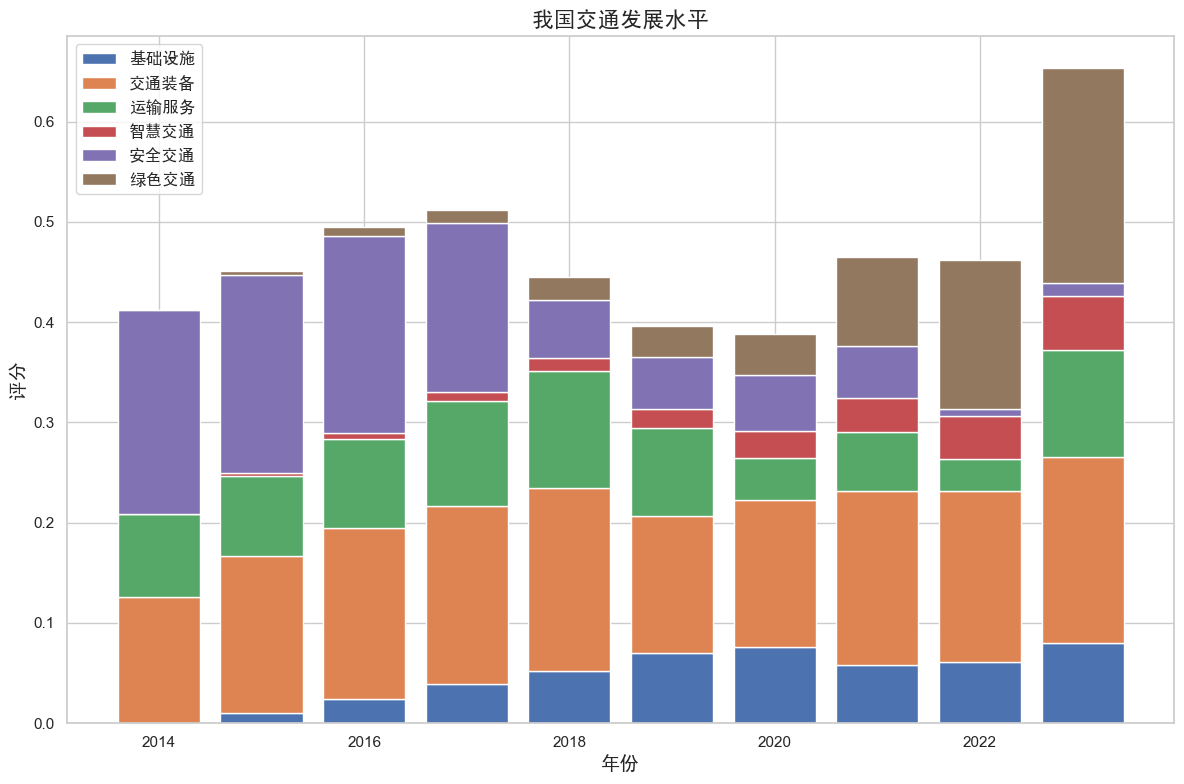

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties

# 设置字体路径
font = FontProperties(fname="Ubuntu_18.04_SimHei.ttf")


sns.set(style="whitegrid")

plt.figure(figsize=(12, 8))

years = df['年份']

# 绘制堆叠条形图
plt.bar(years, df['基础设施评分'], label='基础设施')
plt.bar(years, df['交通装备评分'], bottom=df['基础设施评分'], label='交通装备')
plt.bar(years, df['运输服务评分'], bottom=df['基础设施评分'] + df['交通装备评分'], label='运输服务')
plt.bar(years, df['智慧交通评分'], bottom=df['基础设施评分'] + df['交通装备评分'] + df['运输服务评分'], label='智慧交通')
plt.bar(years, df['安全交通评分'], bottom=df['基础设施评分'] + df['交通装备评分'] + df['运输服务评分'] + df['智慧交通评分'], label='安全交通')
plt.bar(years, df['绿色交通评分'], bottom=df['基础设施评分'] + df['交通装备评分'] + df['运输服务评分'] + df['智慧交通评分'] + df['安全交通评分'], label='绿色交通')

plt.title('我国交通发展水平', fontproperties=font, fontsize=16)
plt.xlabel('年份', fontproperties=font, fontsize=14)
plt.ylabel('评分', fontproperties=font, fontsize=14)
plt.legend(loc='upper left', bbox_to_anchor=(0, 1), prop=font)
plt.tight_layout()

plt.savefig('交通发展水平.jpg')
plt.show()

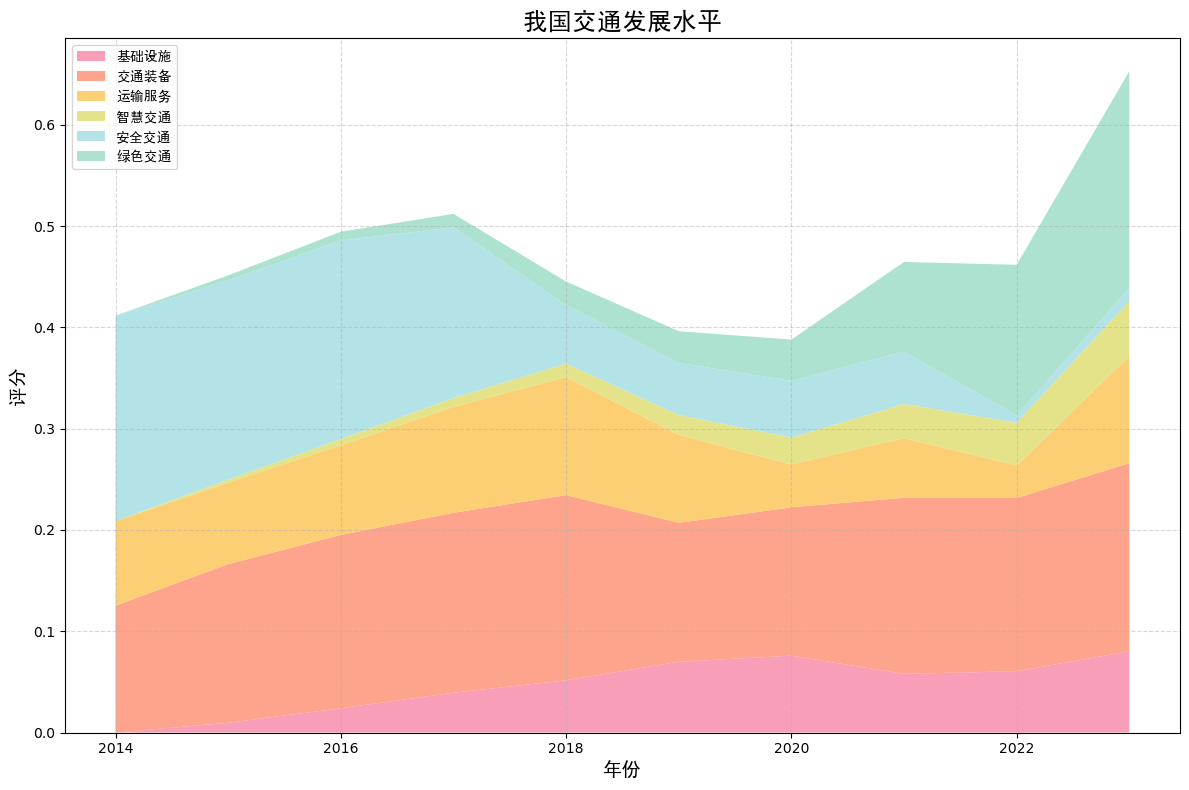

In [6]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.font_manager import FontProperties

# 设置字体
font = FontProperties(fname="Ubuntu_18.04_SimHei.ttf")

# 定义各个维度的评分数据
scores = df[['基础设施评分', '交通装备评分', '运输服务评分', '智慧交通评分', '安全交通评分', '绿色交通评分']].values
years = df['年份']

# 创建堆叠面积图
plt.figure(figsize=(12, 8))

# 设置颜色
# colors = ['#9ADBC5', '#A0DDE0', '#DFDD6C', '#FDC453', '#FE8D6F', '#F886A8']
colors = ['#F886A8', '#FE8D6F', '#FDC453', '#DFDD6C', '#A0DDE0', '#9ADBC5']

# 绘制每个维度的堆叠面积图，增加透明度
plt.stackplot(years, scores.T, labels=['基础设施', '交通装备', '运输服务', '智慧交通', '安全交通', '绿色交通'], alpha=0.8, colors=colors)

# 设置标题和标签
plt.title('我国交通发展水平', fontproperties=font, fontsize=18, fontweight='bold')
plt.xlabel('年份', fontproperties=font, fontsize=14, fontweight='bold')
plt.ylabel('评分', fontproperties=font, fontsize=14, fontweight='bold')

# 添加网格线
plt.grid(True, linestyle='--', alpha=0.5)

# 设置图例，放在合适的位置
plt.legend(loc='upper left', prop=font, fontsize=12)


# 调整布局以避免标签重叠
plt.tight_layout()

# 保存图表
plt.savefig('交通发展水平_堆叠面积图.jpg')

# 显示图表
plt.show()

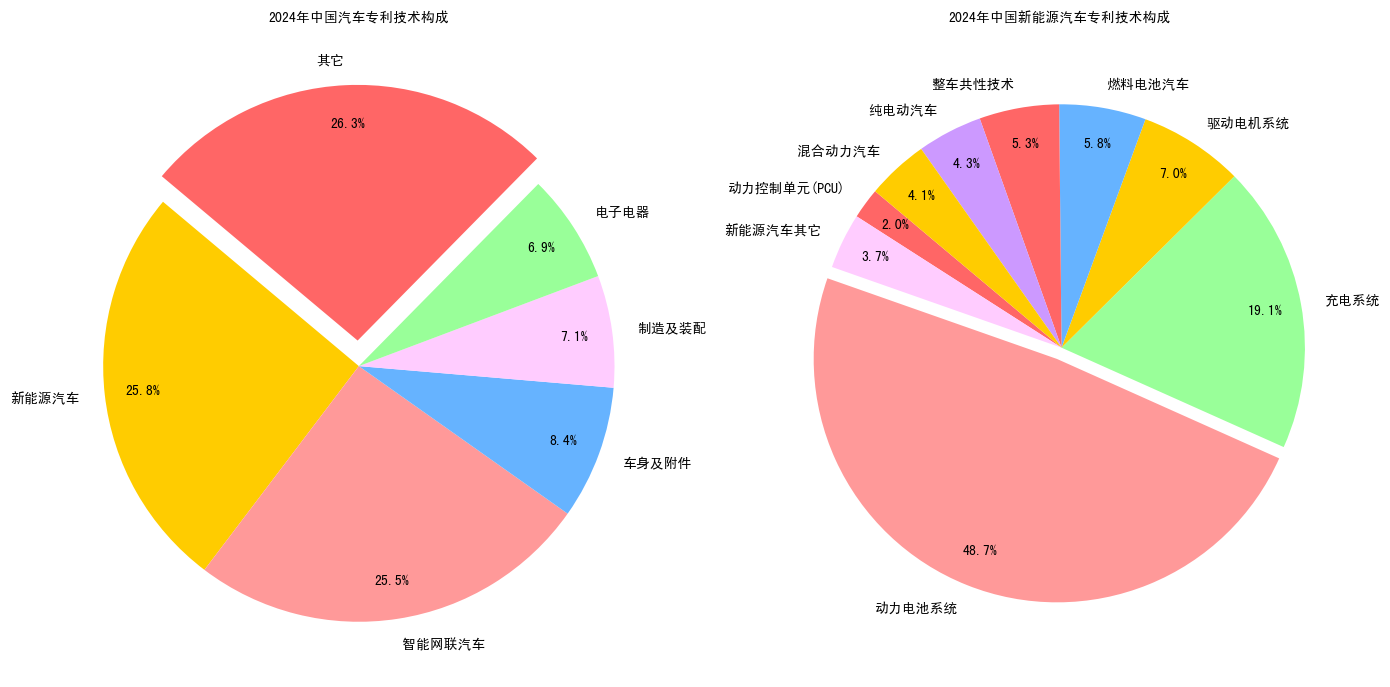

In [10]:
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties

# 设置字体路径
font = FontProperties(fname="Ubuntu_18.04_SimHei.ttf")

# 2024年中国汽车专利技术构成数据
labels_tech = ['新能源汽车', '智能网联汽车', '车身及附件', '制造及装配', '电子电器', '其它']
sizes_tech = [25.79, 25.53, 8.44, 7.08, 6.89, 26.27]

# 2024年中国新能源汽车专利技术构成数据
labels_energy = ['动力控制单元(PCU)', '新能源汽车其它', '动力电池系统', '充电系统', '驱动电机系统', '燃料电池汽车', '整车共性技术', '纯电动汽车', '混合动力汽车']
sizes_energy = [2.04, 3.69, 48.68, 19.13, 6.96, 5.76, 5.30, 4.33, 4.10]

# 设置颜色
colors_tech = ['#ffcc00', '#ff9999', '#66b3ff', '#ffccff', '#99ff99', '#ff6666']
colors_energy = ['#ff6666', '#ffccff', '#ff9999', '#99ff99', '#ffcc00', '#66b3ff', '#ff6666', '#cc99ff', '#ffcc00']

# 创建图表窗口
fig = plt.figure(figsize=(14, 7))

# 绘制第一个饼图 (2024年中国汽车专利技术构成)
ax1 = fig.add_subplot(121)
# 增加explode参数，制造立体效果
explode_tech = (0, 0, 0, 0, 0, 0.1)
ax1.pie(sizes_tech, labels=labels_tech, autopct='%1.1f%%', startangle=140, colors=colors_tech, pctdistance=0.85, explode=explode_tech, textprops={'fontproperties': font})
ax1.set_title('2024年中国汽车专利技术构成', fontproperties=font)
ax1.axis('equal')  # 保证饼图为圆形

# 绘制第二个饼图 (2024年中国新能源汽车专利技术构成)
ax2 = fig.add_subplot(122)
# 增加explode参数，制造立体效果
explode_energy = (0, 0, 0.05, 0, 0, 0, 0, 0, 0)
ax2.pie(sizes_energy, labels=labels_energy, autopct='%1.1f%%', startangle=140, colors=colors_energy, pctdistance=0.85, explode=explode_energy, textprops={'fontproperties': font})
ax2.set_title('2024年中国新能源汽车专利技术构成', fontproperties=font)
ax2.axis('equal')  # 保证饼图为圆形


plt.tight_layout()
plt.savefig('专利技术构成.jpg')
plt.show()

共享汽车市场规模 回归结果：
                            OLS Regression Results                            
Dep. Variable:           共享汽车市场规模(亿元)   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.993
Method:                 Least Squares   F-statistic:                     285.5
Date:                Wed, 02 Apr 2025   Prob (F-statistic):           3.65e-05
Time:                        16:36:21   Log-Likelihood:                -32.327
No. Observations:                   9   AIC:                             74.65
Df Residuals:                       4   BIC:                             75.64
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const              -20.96

D:\Tools\Anaconda3\Lib\site-packages\scipy\stats\_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
D:\Tools\Anaconda3\Lib\site-packages\scipy\stats\_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
D:\Tools\Anaconda3\Lib\site-packages\scipy\stats\_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


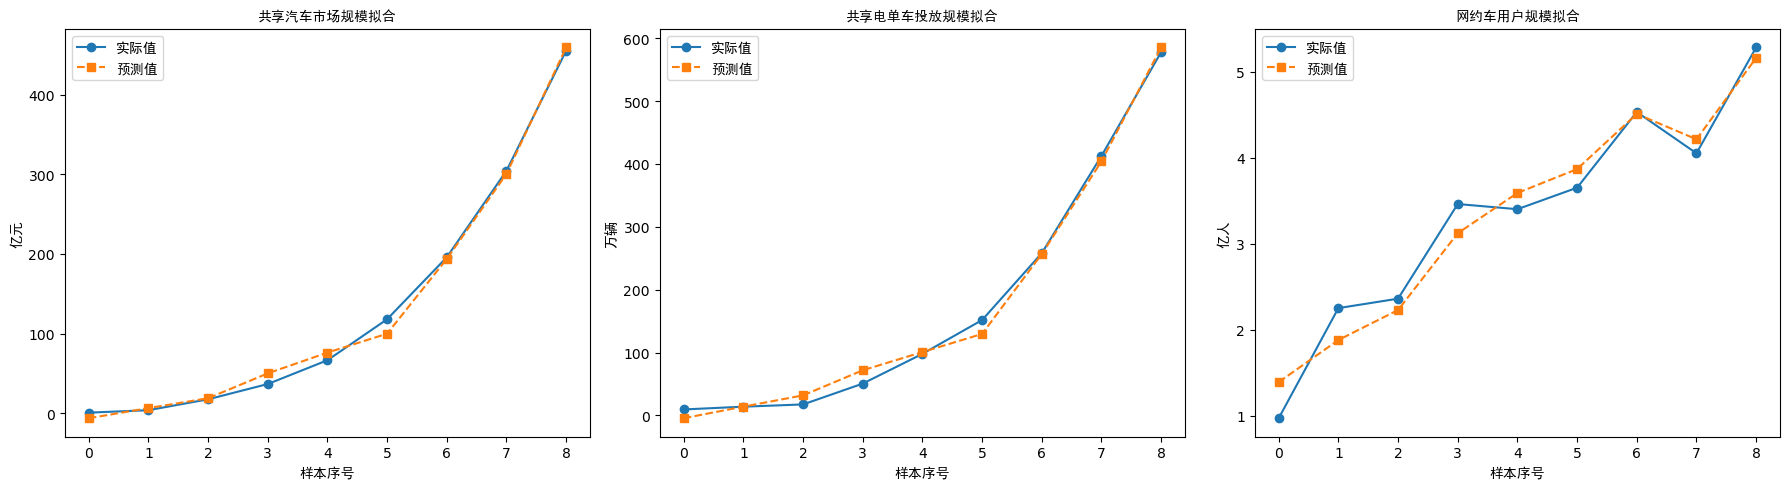

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

# 设置字体路径
font = FontProperties(fname="Ubuntu_18.04_SimHei.ttf")

# 读取Excel文件
file_path = r"d:\我的文档\桌面\比赛\计设\数据集\出行方式指标.xlsx"
df = pd.read_excel(file_path)

# 设置自变量和因变量
X = df[['新能源汽车保有量(万辆)', '新能源汽车市场渗透率(单位:%)', '充电基础设施保有量(万台)', '新能源专利']]
Y1 = df['共享汽车市场规模(亿元)']
Y2 = df['共享电单车投放规模(万辆)']
Y3 = df['网约车用户规模(亿人)']

# 添加常数项（截距）
X_const = sm.add_constant(X)

# 拟合三个回归模型
model1 = sm.OLS(Y1, X_const).fit()
model2 = sm.OLS(Y2, X_const).fit()
model3 = sm.OLS(Y3, X_const).fit()

# 打印回归模型摘要
print("共享汽车市场规模 回归结果：")
print(model1.summary())
print("\n共享电单车投放规模 回归结果：")
print(model2.summary())
print("\n网约车用户规模 回归结果：")
print(model3.summary())

# 预测值
Y1_pred = model1.predict(X_const)
Y2_pred = model2.predict(X_const)
Y3_pred = model3.predict(X_const)

# 绘制拟合图
# 绘制拟合图
fig, axs = plt.subplots(1, 3, figsize=(18, 5))

axs[0].plot(df.index, Y1, 'o-', label='实际值')
axs[0].plot(df.index, Y1_pred, 's--', label='预测值')
axs[0].set_title('共享汽车市场规模拟合', fontproperties=font)
axs[0].set_xlabel('样本序号', fontproperties=font)
axs[0].set_ylabel('亿元', fontproperties=font)
axs[0].legend(prop=font)

axs[1].plot(df.index, Y2, 'o-', label='实际值')
axs[1].plot(df.index, Y2_pred, 's--', label='预测值')
axs[1].set_title('共享电单车投放规模拟合', fontproperties=font)
axs[1].set_xlabel('样本序号', fontproperties=font)
axs[1].set_ylabel('万辆', fontproperties=font)
axs[1].legend(prop=font)

axs[2].plot(df.index, Y3, 'o-', label='实际值')
axs[2].plot(df.index, Y3_pred, 's--', label='预测值')
axs[2].set_title('网约车用户规模拟合', fontproperties=font)
axs[2].set_xlabel('样本序号', fontproperties=font)
axs[2].set_ylabel('亿人', fontproperties=font)
axs[2].legend(prop=font)

plt.tight_layout()
plt.savefig('出行方式的改变.jpg')
plt.show()

D:\Tools\Anaconda3\Lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 26032 (\N{CJK UNIFIED IDEOGRAPH-65B0}) missing from current font.
  fig.canvas.draw()
D:\Tools\Anaconda3\Lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 33021 (\N{CJK UNIFIED IDEOGRAPH-80FD}) missing from current font.
  fig.canvas.draw()
D:\Tools\Anaconda3\Lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 28304 (\N{CJK UNIFIED IDEOGRAPH-6E90}) missing from current font.
  fig.canvas.draw()
D:\Tools\Anaconda3\Lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 19987 (\N{CJK UNIFIED IDEOGRAPH-4E13}) missing from current font.
  fig.canvas.draw()
D:\Tools\Anaconda3\Lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 21033 (\N{CJK UNIFIED IDEOGRAPH-5229}) missing from current font.
  fig.canvas.draw()
D:\Tools\Anaconda3\Lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 20849 (\N{CJK UNIFIED IDEOGRAPH-5171}) missing from current font.
  fig.canvas.draw()
D:\Tools\Anaconda3\Lib

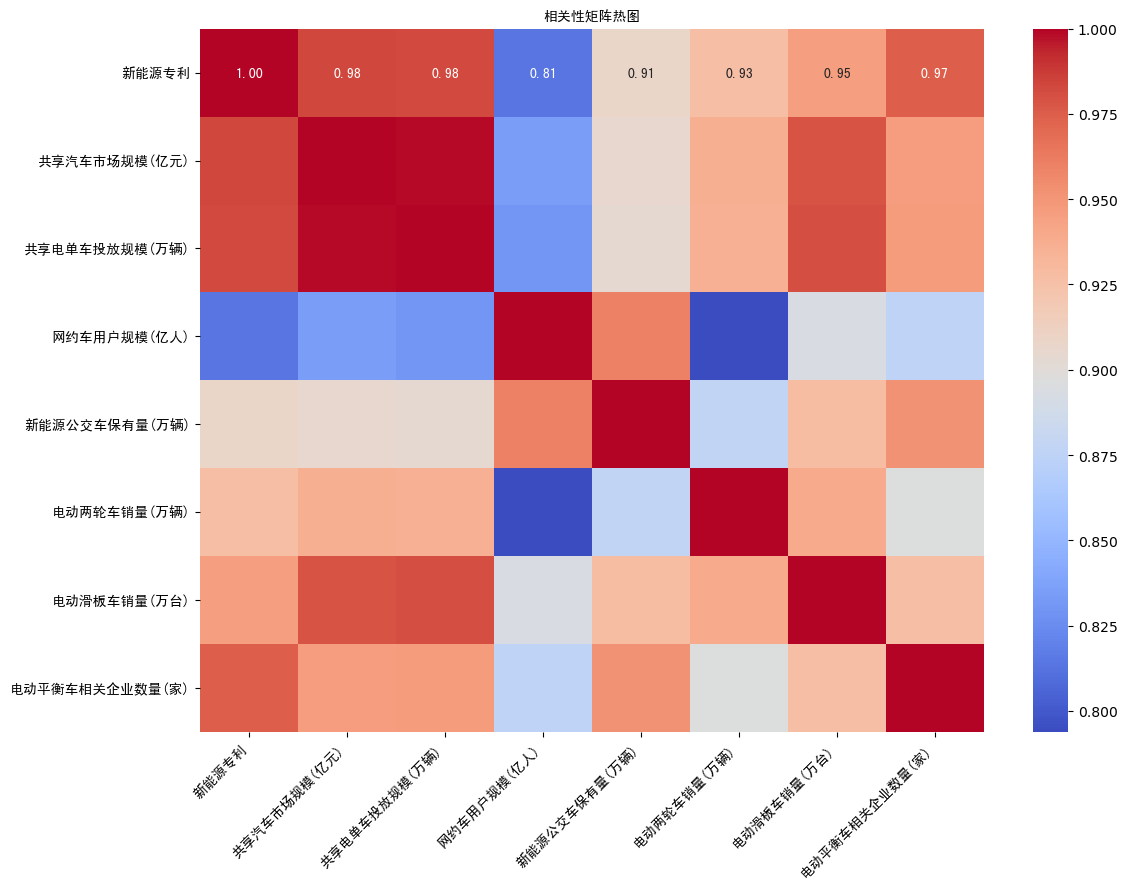

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.font_manager import FontProperties
import matplotlib.font_manager as fm

# 设置字体
font = FontProperties(fname="Ubuntu_18.04_SimHei.ttf")
file_path = r"d:\我的文档\桌面\比赛\计设\数据集\出行方式指标.xlsx"
df = pd.read_excel(file_path)
df = df.drop(columns=['年份', '充电基础设施保有量(万台)'])

# 计算相关性矩阵
df_numeric = df.select_dtypes(include=['number'])
corr_matrix = df_numeric.corr()

# 绘制热力图
fig, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(
    corr_matrix,
    annot=True,
    cmap='coolwarm',
    fmt='.2f',
    annot_kws={'fontproperties': font},  # 只设置单元格内的注释文本字体
    ax=ax
)
ax.set_title('相关性矩阵热图', fontproperties=font)
ax.set_xticklabels(ax.get_xticklabels(), fontproperties=font, rotation=45, ha='right')
ax.set_yticklabels(ax.get_yticklabels(), fontproperties=font, rotation=0)
plt.tight_layout()
plt.savefig('出行方式.jpg')
plt.show()

----- 模型：共享汽车市场规模(亿元) ~ 新能源专利 -----
                            OLS Regression Results                            
Dep. Variable:           共享汽车市场规模(亿元)   R-squared:                       0.966
Model:                            OLS   Adj. R-squared:                  0.962
Method:                 Least Squares   F-statistic:                     201.8
Date:                Sun, 06 Apr 2025   Prob (F-statistic):           2.03e-06
Time:                        00:16:02   Log-Likelihood:                -42.507
No. Observations:                   9   AIC:                             89.01
Df Residuals:                       7   BIC:                             89.41
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -39

D:\Tools\Anaconda3\Lib\site-packages\scipy\stats\_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
D:\Tools\Anaconda3\Lib\site-packages\scipy\stats\_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


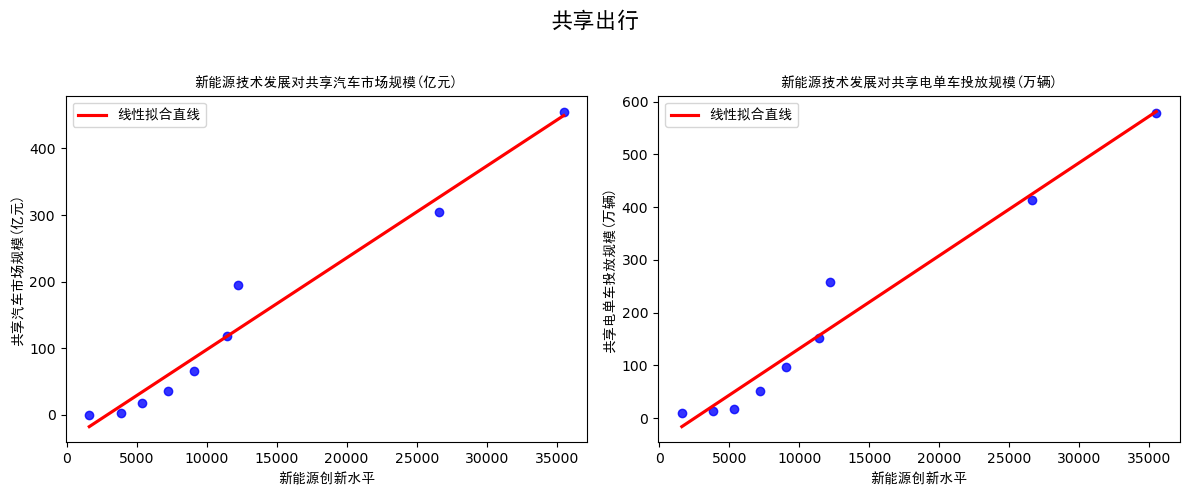

----- 模型：网约车用户规模(亿人) ~ 新能源专利 -----
                            OLS Regression Results                            
Dep. Variable:            网约车用户规模(亿人)   R-squared:                       0.662
Model:                            OLS   Adj. R-squared:                  0.613
Method:                 Least Squares   F-statistic:                     13.70
Date:                Sun, 06 Apr 2025   Prob (F-statistic):            0.00764
Time:                        00:16:03   Log-Likelihood:                -9.7370
No. Observations:                   9   AIC:                             23.47
Df Residuals:                       7   BIC:                             23.87
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.

D:\Tools\Anaconda3\Lib\site-packages\scipy\stats\_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
D:\Tools\Anaconda3\Lib\site-packages\scipy\stats\_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
D:\Tools\Anaconda3\Lib\site-packages\scipy\stats\_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
D:\Tools\Anaconda3\Lib\site-packages\scipy\stats\_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


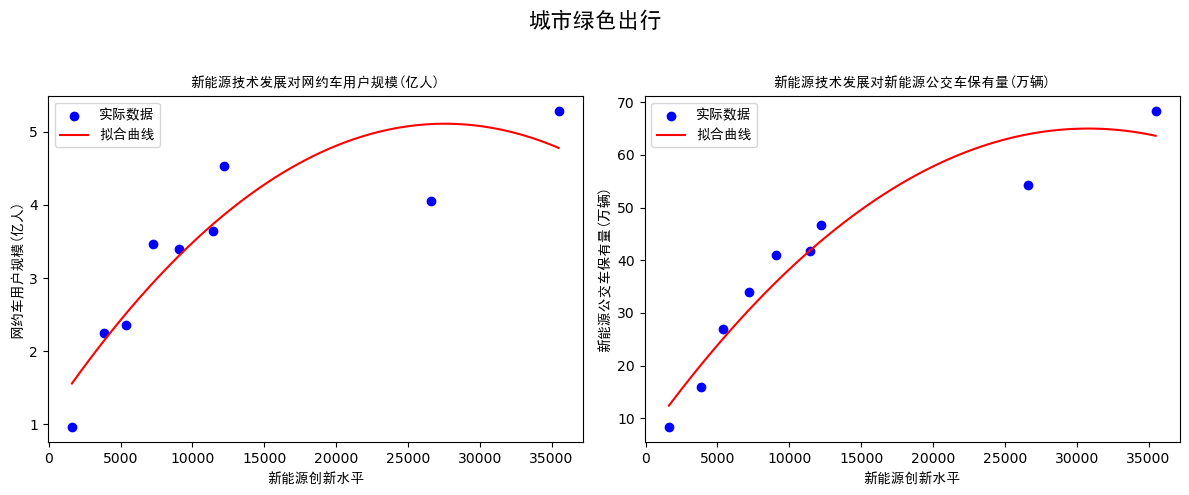

----- 模型：电动两轮车销量(万辆) ~ 新能源专利 -----
                            OLS Regression Results                            
Dep. Variable:            电动两轮车销量(万辆)   R-squared:                       0.859
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     42.58
Date:                Sun, 06 Apr 2025   Prob (F-statistic):           0.000326
Time:                        00:16:03   Log-Likelihood:                -65.938
No. Observations:                   9   AIC:                             135.9
Df Residuals:                       7   BIC:                             136.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2885.

D:\Tools\Anaconda3\Lib\site-packages\scipy\stats\_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
D:\Tools\Anaconda3\Lib\site-packages\scipy\stats\_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
D:\Tools\Anaconda3\Lib\site-packages\scipy\stats\_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


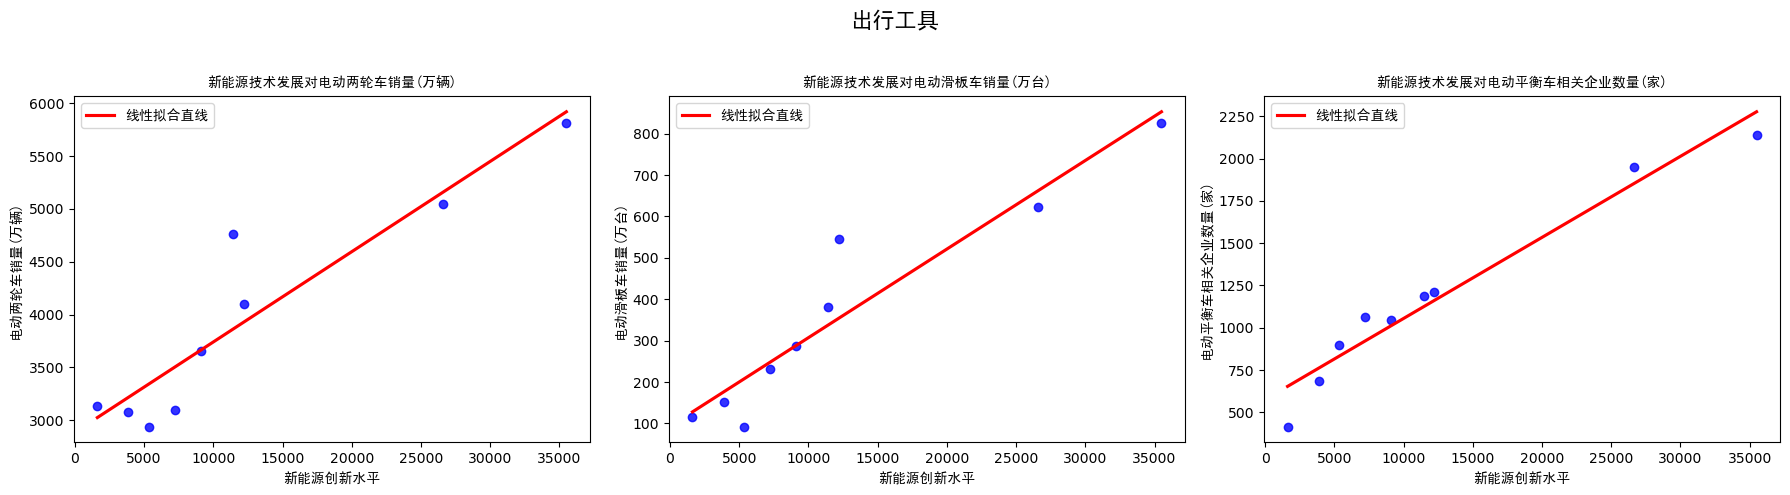

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from matplotlib.font_manager import FontProperties
import matplotlib.font_manager as fm

# 设置字体
font = FontProperties(fname="Ubuntu_18.04_SimHei.ttf")

file_path = r"d:\我的文档\桌面\比赛\计设\数据集\出行方式指标.xlsx"
df = pd.read_excel(file_path)
if '年份' in df.columns:
    df = df.drop(columns=['年份'])

# 共享化、低碳化、多元化相关指标
simple_groups = {
    "共享出行": [
        "共享汽车市场规模(亿元)", "共享电单车投放规模(万辆)"
    ],
    "城市绿色出行": [
        "网约车用户规模(亿人)", "新能源公交车保有量(万辆)"
    ],
    "出行工具": [
        "电动两轮车销量(万辆)", "电动滑板车销量(万台)", "电动平衡车相关企业数量(家)"
    ]
}

for group_title, dep_vars in simple_groups.items():
    n = len(dep_vars)
    # 每组绘制一行 n 列的子图
    fig, axes = plt.subplots(1, n, figsize=(6*n, 5))
    if n == 1:
        axes = [axes]
    
    for ax, dv in zip(axes, dep_vars):
        # 构造线性回归模型
        X = sm.add_constant(df["新能源专利"])
        y = df[dv]
        model_linear = sm.OLS(y, X).fit()
        r_squared = model_linear.rsquared
        
        print(f"----- 模型：{dv} ~ 新能源专利 -----")
        print(model_linear.summary())
        print("="*80)
        
        # 判断 R² 是否达到 0.85
        if r_squared >= 0.85:
            print("采用线性回归")
            # 绘制线性回归：散点和拟合直线
            sns.regplot(
                x="新能源专利",
                y=dv,
                data=df,
                ax=ax,
                scatter_kws={'label': '实际数据', 'color': 'blue'},
                line_kws={'label': '线性拟合直线', 'color': 'red'},
                ci=None  
            )
        else:
            print("采用非线性回归")
            df["新能源专利_2"] = df["新能源专利"] ** 2
            X_poly = sm.add_constant(df[["新能源专利", "新能源专利_2"]])
            model_poly = sm.OLS(y, X_poly).fit()
            print(model_poly.summary())
            
            x_vals = np.linspace(df["新能源专利"].min(), df["新能源专利"].max(), 100)
            new_df = pd.DataFrame({"新能源专利": x_vals})
            new_df["新能源专利_2"] = new_df["新能源专利"] ** 2
            y_poly_pred = model_poly.predict(sm.add_constant(new_df[["新能源专利", "新能源专利_2"]]))
            
            # 绘制实际数据散点图和拟合曲线
            ax.scatter(df["新能源专利"], y, color='blue', label='实际数据')
            ax.plot(x_vals, y_poly_pred, color='red', label='拟合曲线')
        
        ax.legend(prop=font)
        ax.set_title(f"新能源技术发展对{dv}", fontproperties=font)
        ax.set_xlabel("新能源创新水平", fontproperties=font)
        ax.set_ylabel(dv, fontproperties=font)
    
    plt.suptitle(group_title, fontproperties=font, fontsize=16)
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.savefig(f'{group_title}.jpg')
    plt.show()

In [1]:
# 对就业的影响
import pandas as pd
import numpy as np

# 数据清洗
df = pd.read_excel(r"d:\我的文档\桌面\比赛\计设\数据集\就业相关指标.xlsx")

# 删除重复数据
df = df.drop_duplicates(subset=["企业名称", "招聘岗位", "招聘发布日期"])

# 转换为日期格式
df["招聘发布日期"] = pd.to_datetime(df["招聘发布日期"], errors="coerce")

# 异常数据处理
df["招聘人数"] = df["招聘人数"].astype(str).replace("若干", "10")
df["招聘人数"] = pd.to_numeric(df["招聘人数"], errors="coerce")
df["招聘人数"] = df["招聘人数"].fillna(1)
df["工作城市"] = df["工作城市"].astype(str).str.replace("市", "", regex=False)

# 处理完数据
cleaned_df = df[["招聘发布日期", "工作城市", "招聘岗位", "招聘人数"]]

cleaned_df.to_excel("就业相关指标_cleaned.xlsx", index=False)
cleaned_df

,招聘发布日期,工作城市,招聘岗位,招聘人数
0,2020-03-09,南通,充电桩销售推广员（园区、物业、楼宇）(国动网络通信),1.0
1,2018-09-20,昆明,新能源汽车充电桩市场经理,10.0
2,2022-04-12,洛阳,充电桩测试工程师,2.0
3,2020-07-26,深圳,充电桩销售推广员（园区、物业、楼宇）(国动网络通信),1.0
4,2022-11-24,天津,天津新能源充电桩招商经理/业务员,1.0
...,...,...,...,...
807,2019-03-30,常州,镍氢电池助理工程师,1.0
808,2019-12-24,西安,陕西西安城市销售主管(南孚电池),1.0
809,2023-08-08,保定,电池研发工程师,1.0
810,2022-06-23,焦作,锂电池材料研发工程师,2.0


Epoch 1/100


D:\Tools\Anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.0313 - learning_rate: 0.0010
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0402 - learning_rate: 0.0010
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0084 - learning_rate: 0.0010
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0152 - learning_rate: 0.0010
Epoch 5/100
 1/10 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0241

D:\Tools\Anaconda3\Lib\site-packages\keras\src\callbacks\early_stopping.py:155: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss
  current = self.get_monitor_value(logs)
D:\Tools\Anaconda3\Lib\site-packages\keras\src\callbacks\callback_list.py:96: UserWarning: Learning rate reduction is conditioned on metric `val_loss` which is not available. Available metrics are: loss,learning_rate.
  callback.on_epoch_end(epoch, logs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0280 - learning_rate: 0.0010
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0140 - learning_rate: 0.0010
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0158 - learning_rate: 0.0010
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0140 - learning_rate: 0.0010
Epoch 9/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0088 - learning_rate: 0.0010
Epoch 10/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0366 - learning_rate: 0.0010
Epoch 11/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0319 - learning_rate: 0.0010
Epoch 12/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0379 - learning_rate: 0.0010
Epoch 13/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0178 - learning_rate: 0.0010
Epoch 14/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0142 - learning_rate: 0.0010
Epoch 15/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0143 - learning_rate: 0.0010
Epoch 16/100
10/

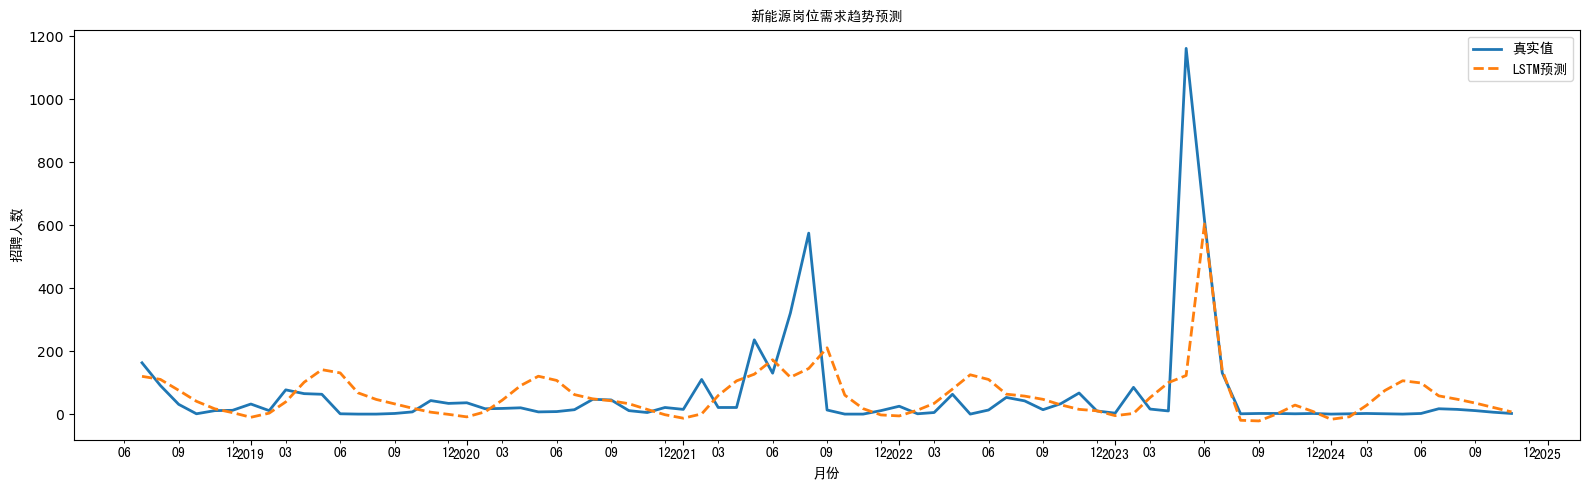

In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
import matplotlib.dates as mdates
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

df = pd.read_excel("就业相关指标_cleaned.xlsx")
df["招聘发布日期"] = pd.to_datetime(df["招聘发布日期"])
df["年月"] = df["招聘发布日期"].dt.to_period("M").astype(str)

# 按月汇总招聘人数
monthly = df.groupby("年月")["招聘人数"].sum().reset_index()
monthly.columns = ["date", "demand"]
monthly["date"] = pd.to_datetime(monthly["date"])
monthly = monthly.set_index("date").resample("MS").sum().reset_index()

# 增加时间特征
monthly["month"] = monthly["date"].dt.month
monthly["year"] = monthly["date"].dt.year

# 数据归一化
scaler = MinMaxScaler()
monthly[["demand", "month"]] = scaler.fit_transform(monthly[["demand", "month"]])

# 构造序列样本
def create_multi_input_sequences(data, target_col, window=6):
    X, y = [], []
    for i in range(len(data) - window):
        seq = data.iloc[i:i+window][["demand", "month"]].values
        target = data.iloc[i+window][target_col]
        X.append(seq)
        y.append(target)
    return np.array(X), np.array(y)

X, y = create_multi_input_sequences(monthly, "demand", window=6)

# 构建 LSTM 模型
model = Sequential([
    LSTM(64, return_sequences=True, input_shape=(X.shape[1], X.shape[2])),
    Dropout(0.2),
    LSTM(32),
    Dropout(0.2),
    Dense(1)
])
model.compile(optimizer='adam', loss='mse')

# 设置训练回调
callbacks = [
    EarlyStopping(patience=10, restore_best_weights=True),
    ReduceLROnPlateau(patience=5)
]

# 模型训练
model.fit(X, y, epochs=100, batch_size=8, verbose=1, callbacks=callbacks)

# 预测与还原
y_pred = model.predict(X)
y_pred_inverse = scaler.inverse_transform(np.concatenate([y_pred, X[:, -1:, 1]], axis=-1))[:, 0]
y_true_inverse = scaler.inverse_transform(np.concatenate([y.reshape(-1, 1), X[:, -1:, 1]], axis=-1))[:, 0]

# 中文字体设置
font = FontProperties(fname="Ubuntu_18.04_SimHei.ttf")  

# 可视化
plt.figure(figsize=(16, 5))
plt.plot(monthly["date"].iloc[6:], y_true_inverse, label="真实值", linewidth=2)
plt.plot(monthly["date"].iloc[6:], y_pred_inverse, label="LSTM预测", linestyle="--", linewidth=2)

# 设置刻度为年 + 月
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
ax.xaxis.set_minor_locator(mdates.MonthLocator(interval=3))
ax.xaxis.set_minor_formatter(mdates.DateFormatter('%m'))

plt.setp(ax.xaxis.get_majorticklabels(), fontproperties=font)
plt.setp(ax.xaxis.get_minorticklabels(), rotation=0, fontsize=9, fontproperties=font)
plt.subplots_adjust(bottom=0.5)
plt.xlabel("月份", fontproperties=font)
plt.ylabel("招聘人数", fontproperties=font)
plt.title("新能源岗位需求趋势预测", fontproperties=font)
plt.legend(prop=font)
plt.tight_layout()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


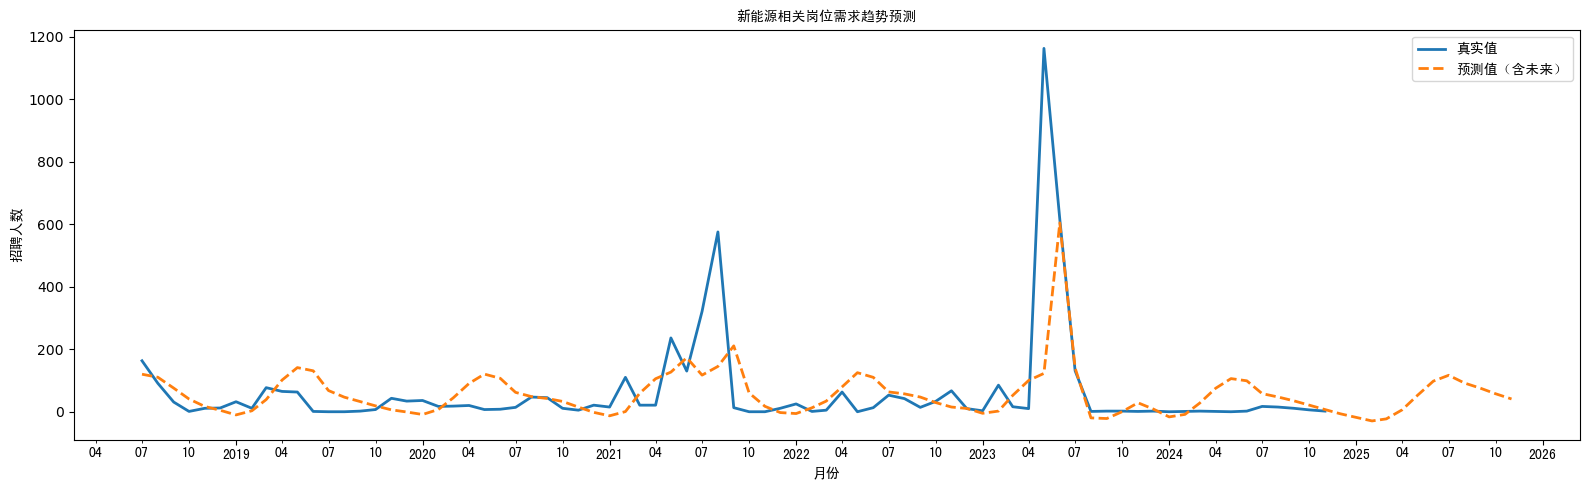

In [3]:
# 预测未来n个月
n_months = 12  
future_preds = []
future_dates = []

# 当前序列
last_seq = monthly[["demand", "month"]].values[-6:].tolist()

# 最近已知的日期，用于生成未来月份的时间戳
last_date = monthly["date"].iloc[-1]

for i in range(n_months):
    current_input = np.array(last_seq).reshape(1, 6, 2)
    
    # 预测
    pred_scaled = model.predict(current_input)[0, 0]
    
    # 推测下个月份
    last_month_real = last_seq[-1][1] * 12  # month 是归一化后的
    next_month_real = (int(last_month_real) % 12) + 1
    next_month_scaled = next_month_real / 12
    
    # 添加到序列尾部，准备下一次预测
    last_seq.append([pred_scaled, next_month_scaled])
    last_seq = last_seq[1:]  # 滚动窗口保持6个
    
    # 反归一化
    pred_inverse = scaler.inverse_transform([[pred_scaled, next_month_scaled]])[0, 0]
    future_preds.append(pred_inverse)
    
    # 推出日期标签
    next_date = pd.date_range(start=last_date, periods=2, freq="MS")[1]
    future_dates.append(next_date)
    last_date = next_date  # 循环推进

# 可视化未来预测结果
# 拼接历史和预测数据
full_dates = list(monthly["date"].iloc[6:]) + future_dates
full_true = list(y_true_inverse) + [np.nan] * n_months
full_pred = list(y_pred_inverse) + future_preds

plt.figure(figsize=(16, 5))
plt.plot(full_dates, full_true, label="真实值", linewidth=2)
plt.plot(full_dates, full_pred, label="预测值（含未来）", linestyle="--", linewidth=2)

# 设置横轴时间格式
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
ax.xaxis.set_minor_locator(mdates.MonthLocator(interval=3))
ax.xaxis.set_minor_formatter(mdates.DateFormatter('%m'))

plt.setp(ax.xaxis.get_majorticklabels(), fontproperties=font)
plt.setp(ax.xaxis.get_minorticklabels(), rotation=0, fontsize=9, fontproperties=font)
plt.subplots_adjust(bottom=0.5)
plt.xlabel("月份", fontproperties=font)
plt.ylabel("招聘人数", fontproperties=font)
plt.title(f"新能源相关岗位需求趋势预测", fontproperties=font)
plt.legend(prop=font)
plt.tight_layout()
plt.savefig('新能源相关岗位.jpg')
plt.show()

In [ ]:
# 预测未来n个月
n_months = 12  
future_preds = []
future_dates = []

# 当前序列
last_seq = monthly[["demand", "month"]].values[-6:].tolist()

# 最近已知的日期，用于生成未来月份的时间戳
last_date = monthly["date"].iloc[-1]

for i in range(n_months):
    current_input = np.array(last_seq).reshape(1, 6, 2)
    
    # 预测
    pred_scaled = model.predict(current_input)[0, 0]
    
    # 推测下个月份
    last_month_real = last_seq[-1][1] * 12  # month 是归一化后的
    next_month_real = (int(last_month_real) % 12) + 1
    next_month_scaled = next_month_real / 12
    
    # 添加到序列尾部，准备下一次预测
    last_seq.append([pred_scaled, next_month_scaled])
    last_seq = last_seq[1:]  # 滚动窗口保持6个
    
    # 反归一化
    pred_inverse = scaler.inverse_transform([[pred_scaled, next_month_scaled]])[0, 0]
    future_preds.append(pred_inverse)
    
    # 推出日期标签
    next_date = pd.date_range(start=last_date, periods=2, freq="MS")[1]
    future_dates.append(next_date)
    last_date = next_date  # 循环推进

# 可视化未来预测结果
# 拼接历史和预测数据
full_dates = list(monthly["date"].iloc[6:]) + future_dates
full_true = list(y_true_inverse) + [np.nan] * n_months
full_pred = list(y_pred_inverse) + future_preds

# 美化图形
plt.figure(figsize=(16, 8))  # 增大图形以便更清晰
plt.plot(full_dates, full_true, label="真实值", linewidth=3, color='b', marker='o', markersize=6)
plt.plot(full_dates, full_pred, label="预测值（含未来）", linestyle="--", linewidth=3, color='r', marker='x', markersize=6)

# 设置横轴时间格式
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
ax.xaxis.set_minor_locator(mdates.MonthLocator(interval=3))
ax.xaxis.set_minor_formatter(mdates.DateFormatter('%m'))

# 设置字体
plt.setp(ax.xaxis.get_majorticklabels(), fontsize=12, fontweight='bold', color='darkblue')
plt.setp(ax.xaxis.get_minorticklabels(), rotation=45, fontsize=9, fontweight='light', color='grey')

# 美化标签和标题
plt.xlabel("月份", fontsize=14, fontweight='bold')
plt.ylabel("招聘人数", fontsize=14, fontweight='bold')
plt.title("新能源相关岗位需求趋势预测", fontsize=16, fontweight='bold')

# 增加图例
plt.legend(prop={'size': 12, 'weight': 'bold'}, loc='upper left', fontsize=12)

# 设置网格并美化
plt.grid(True, linestyle='--', alpha=0.7)

# 设置背景颜色和图表的外观
plt.gca().set_facecolor('whitesmoke')  # 设置背景颜色
plt.gcf().patch.set_facecolor('lightgrey')  # 设置整个图表的背景颜色

plt.tight_layout()

# 保存和展示图表
plt.savefig('新能源相关岗位_美化.jpg', dpi=300)
plt.show()

In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import linkage, dendrogram

file_path = "就业相关指标_cleaned.xlsx"
df = pd.read_excel(file_path)

# 城市层面统计指标
city_stats = df.groupby("工作城市").agg({
    "招聘人数": "sum",
    "招聘岗位": "count"
}).reset_index()
city_stats.columns = ["工作城市", "总招聘人数", "岗位数量"]
#city_stats = city_stats[(city_stats["总招聘人数"] >= 5) & (city_stats["岗位数量"] >= 2)]
city_stats

,工作城市,总招聘人数,岗位数量
0,三亚,15,1
1,三门峡,2,2
2,上海,263,48
3,上饶,30,2
4,东莞,166,24
...,...,...,...
143,韶关,2,2
144,驻马店,11,2
145,鹰潭,1,1
146,黄山,11,2


In [2]:
# 城市转省份映射字典（你可以按需继续扩展）
city_to_province = {
    "北京": "北京市", "上海": "上海市", "广州": "广东省", "深圳": "广东省", "东莞": "广东省", "珠海": "广东省", "南京": "江苏省", "苏州": "江苏省", "无锡": "江苏省", "常州": "江苏省", 
    "镇江": "江苏省", "盐城": "江苏省", "南通": "江苏省", "泰州": "江苏省", "淮安": "江苏省","杭州": "浙江省", "宁波": "浙江省", "金华": "浙江省", "温州": "浙江省", "台州": "浙江省",
    "长沙": "湖南省", "武汉": "湖北省", "成都": "四川省", "西安": "陕西省", "济南": "山东省","郑州": "河南省", "合肥": "安徽省", "南昌": "江西省", "昆明": "云南省", "南宁": "广西壮族自治区",
    "福州": "福建省", "厦门": "福建省", "重庆": "重庆市", "天津": "天津市","三亚": "海南省","兰州": "甘肃省","十堰": "湖北省","南平": "福建省","吕梁": "山西省","呼和浩特": "内蒙古自治区","哈尔滨": "黑龙江省",
    "唐山": "河北省","三门峡": "河南省","上饶": "江西省","中山": "广东省","临汾": "山西省","临沂": "山东省","义乌": "浙江省","乐山": "四川省","亳州": "安徽省","佛山": "广东省","保定": "河北省",
    "六盘水": "贵州省","商丘": "河南省","嘉兴": "浙江省","大同": "山西省","大连": "辽宁省","太原": "山西省","威海": "山东省","娄底": "湖南省","宁德": "福建省", "安庆": "安徽省","宜春": "江西省",
    "宝鸡": "陕西省","宣城": "安徽省","宿迁": "江苏省","岳阳": "湖南省","崇左": "广西壮族自治区","常德": "湖南省","平顶山": "河南省","廊坊": "河北省","开封": "河南省","张家口": "河北省",
    "徐州": "江苏省","德州": "山东省","忻州": "山西省","惠州": "广东省","扬州": "江苏省","承德": "河北省","新乡": "河南省","新余": "江西省","晋城": "山西省","景德镇": "江西省","朔州": "山西省",
    "来宾": "广西壮族自治区","枣庄": "山东省","柳州": "广西壮族自治区","株洲": "湖南省","梅州": "广东省","梧州": "广西壮族自治区","永州": "湖南省","汉中": "陕西省","江门": "广东省","沈阳": "辽宁省",
    "沧州": "河北省","洛阳": "河南省","济宁": "山东省","海口": "海南省","淄博": "山东省","淮南": "安徽省","渭南": "陕西省","湖州": "浙江省","湘潭": "湖南省",
    "湘西": "湖南省","湛江": "广东省","滁州": "安徽省","滨州": "山东省","漳州": "福建省","烟台": "山东省","焦作": "河南省","白城": "吉林省","益阳": "湖南省","石家庄": "河北省",
    "秦皇岛": "河北省","绍兴": "浙江省","绥化": "黑龙江省","绵阳": "四川省","聊城": "山东省","肇庆": "广东省","自贡": "四川省","芜湖": "安徽省","茂名": "广东省","荆州": "湖北省",
    "荆门": "湖北省","莆田": "福建省","菏泽": "山东省","葫芦岛": "辽宁省","衡水": "河北省","衢州": "浙江省","赣州": "江西省","赤峰": "内蒙古自治区","运城": "山西省","通化": "吉林省",
    "遂宁": "四川省","遵义": "贵州省","邢台": "河北省","邯郸": "河北省","郴州": "湖南省","鄂尔多斯": "内蒙古自治区","铜仁": "贵州省","长春": "吉林省","长治": "山西省","青岛": "山东省",
    "韶关": "广东省","驻马店": "河南省","鹰潭": "江西省","黄山": "安徽省","齐齐哈尔": "黑龙江省"
}

# 映射城市为省份
city_stats["省份"] = city_stats["工作城市"].map(city_to_province)
city_stats

,工作城市,总招聘人数,岗位数量,省份
0,三亚,15,1,海南省
1,三门峡,2,2,河南省
2,上海,263,48,上海市
3,上饶,30,2,江西省
4,东莞,166,24,广东省
...,...,...,...,...
143,韶关,2,2,广东省
144,驻马店,11,2,河南省
145,鹰潭,1,1,江西省
146,黄山,11,2,安徽省


In [3]:
# 对省份进行聚合，计算每个省的总招聘人数和岗位数量
province_stats = city_stats.groupby("省份").agg({
    "总招聘人数": "sum",
    "岗位数量": "sum"
}).reset_index()
province_stats

,省份,总招聘人数,岗位数量
0,上海市,263,48
1,云南省,19,6
2,内蒙古自治区,5,3
3,北京市,83,32
4,吉林省,24,6
5,四川省,140,30
6,天津市,96,16
7,安徽省,422,30
8,山东省,180,33
9,山西省,138,21


In [4]:
from sklearn.preprocessing import MinMaxScaler

# 对省份数据进行归一化
scaler = MinMaxScaler()
province_stats_scaled = scaler.fit_transform(province_stats[["总招聘人数", "岗位数量"]])

# 将归一化后的数据重新放回province_stats中
province_stats_scaled_df = pd.DataFrame(province_stats_scaled, columns=["总招聘人数", "岗位数量"])
province_stats = pd.concat([province_stats["省份"], province_stats_scaled_df], axis=1)

province_stats.to_excel("聚类数据.xlsx", index=False)

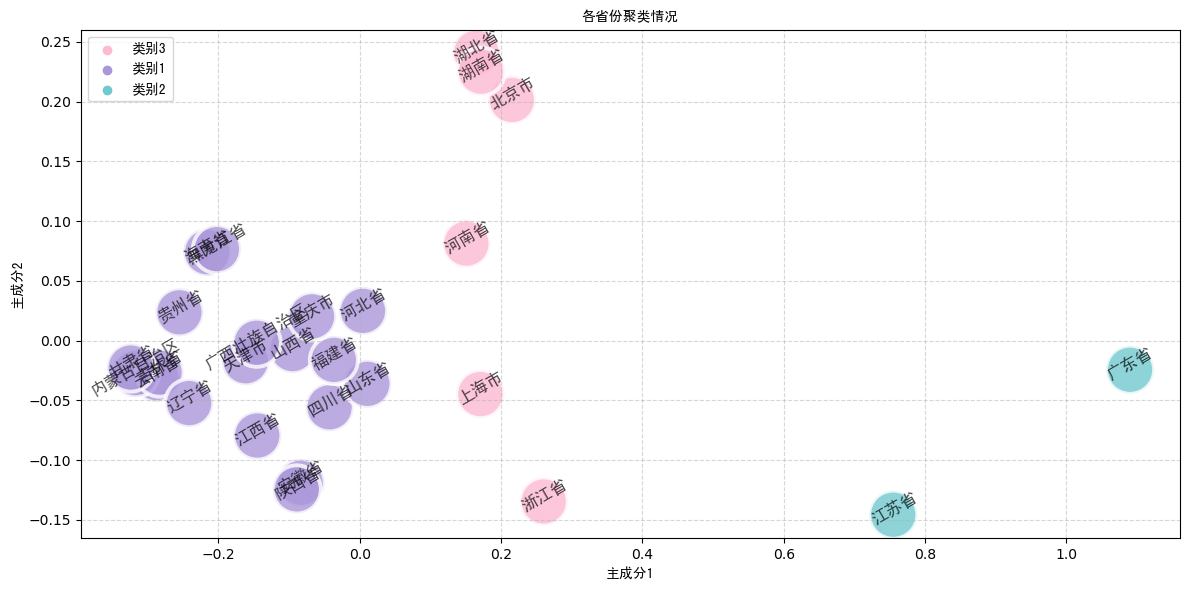

In [34]:
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.font_manager import FontProperties

file_path = r"d:\我的文档\桌面\比赛\计设\数据集\聚类数据.xlsx"
df = pd.read_excel(file_path, sheet_name="Sheet1")

features = df[["总招聘人数", "岗位数量"]]

# 使用PCA降维到2维
pca = PCA(n_components=2)
features_pca = pca.fit_transform(features)

# 创建散点图
plt.figure(figsize=(12, 6))
sns.scatterplot(
    x=features_pca[:, 0],
    y=features_pca[:, 1],
    hue=df["聚类种类"],
    palette={"类别1": "#aa96da", "类别2": "#71c9ce", "类别3": "#fcbad3"},
    s=1200,
    edgecolor="white",
    alpha=0.8
)

# 标注所有省份名称
for i, province in enumerate(df["省份"]):
    plt.annotate(
        province,
        (features_pca[i, 0], features_pca[i, 1]),
        fontproperties=font,
        fontsize=12,
        ha="center",
        va="center",
        rotation=30,
        alpha=0.7,
        textcoords="offset points",
        xytext=(0, 5)  # 微调标签位置
    )

# 坐标轴与标题设置
font = FontProperties(fname="Ubuntu_18.04_SimHei.ttf")  
plt.xlabel("主成分1", fontsize=10, fontproperties=font)
plt.ylabel("主成分2", fontsize=10, fontproperties=font)
plt.title("各省份聚类情况", fontsize=12, fontproperties=font)
plt.grid(True, linestyle="--", alpha=0.5)
plt.legend(loc="upper left", prop=font)
plt.tight_layout()
plt.savefig('聚类情况.jpg')
plt.show()